# **ICC Men's T20 World Cup 2022 - Exploratory Data Analysis**

## *Data Exploration:*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Dataset
df = pd.read_csv(r"D:\\Python Data\\Projects\\Mentorness Internship Projects\\ML Internship Task 3\\T-20 World cup 2022.csv", encoding='latin1')

In [3]:
# Checking shape and heads of the dataset
print(df.shape)
print("-"*15)
print(df.head())

(9814, 44)
---------------
   comment_id  match_id match_name home_team away_team current_innings  \
0         130   1298179  ENG v PAK       PAK       ENG             PAK   
1         120   1298179  ENG v PAK       PAK       ENG             PAK   
2         110   1298179  ENG v PAK       PAK       ENG             PAK   
3         140   1298179  ENG v PAK       PAK       ENG             PAK   
4         150   1298179  ENG v PAK       PAK       ENG             PAK   

   innings_id  over  ball  runs  ... wicket_id  wkt_batsman_name  \
0           1     1     1     0  ...       NaN               NaN   
1           1     1     1     1  ...       NaN               NaN   
2           1     1     1     1  ...       NaN               NaN   
3           1     1     2     2  ...       NaN               NaN   
4           1     1     3     0  ...       NaN               NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls wkt_text  \
0              NaN               NaN               

In [4]:
# Columns in the dataset
print(f'Dataset columns: ', df.columns)

Dataset columns:  Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText'],
      dtype='object')


### Short description of each column:

- `comment_id`: ID for each comment in the dataset.
- `match_id`: ID for each match in the dataset.
- `match_name`: Name of the match.
- `home_team`: Name of the home team.
- `away_team`: Name of the away team.
- `current_innings`: Current innings number.
- `innings_id`: ID for each innings in the match.
- `over`: Over number.
- `ball`: Ball number within the over.
- `runs`: Number of runs scored off the ball.
- `shortText`: Short description or event associated with the ball.
- `isBoundary`: Binary indicator if the ball resulted in a boundary (0 for no, 1 for yes).
- `isWide`: Binary indicator if the ball was wide (0 for no, 1 for yes).
- `isNoball`: Binary indicator if the ball was a no-ball (0 for no, 1 for yes).
- `batsman1_id`: ID of the first batsman.
- `batsman1_name`: Name of the first batsman.
- `batsman1_runs`: Runs scored by the first batsman.
- `batsman1_balls`: Balls faced by the first batsman.
- `bowler1_id`: ID of the first bowler.
- `bowler1_name`: Name of the first bowler.
- `bowler1_overs`: Overs bowled by the first bowler.
- `bowler1_maidens`: Maiden overs bowled by the first bowler.
- `bowler1_runs`: Runs conceded by the first bowler.
- `bowler1_wkts`: Wickets taken by the first bowler.
- `batsman2_id`: ID of the second batsman.
- `batsman2_name`: Name of the second batsman.
- `batsman2_runs`: Runs scored by the second batsman.
- `batsman2_balls`: Balls faced by the second batsman.
- `bowler2_id`: ID of the second bowler.
- `bowler2_name`: Name of the second bowler.
- `bowler2_overs`: Overs bowled by the second bowler.
- `bowler2_maidens`: Maiden overs bowled by the second bowler.
- `bowler2_runs`: Runs conceded by the second bowler.
- `bowler2_wkts`: Wickets taken by the second bowler.
- `wicket_id`: ID for each wicket event.
- `wkt_batsman_name`: Name of the batsman who got out.
- `wkt_bowler_name`: Name of the bowler who took the wicket.
- `wkt_batsman_runs`: Runs scored by the batsman who got out.
- `wkt_batsman_balls`: Balls faced by the batsman who got out.
- `wkt_text`: Description of the wicket event.
- `isRetiredHurt`: Binary indicator if the batsman retired hurt (0 for no, 1 for yes).
- `text`: Commentary text associated with the ball.
- `preText`: Pre-match commentary snippet.
- `postText`: Post-match commentary snippet.

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

In [6]:
# Description about the dataset
columns_to_exclude = [col for col in df.columns if '_id' in col] # Filtered out columns containing '_id'
df_description = df.drop(columns=columns_to_exclude).describe().T

print("Description of DataFrame (Excluding columns with 'id' in their names):")
print(df_description)

Description of DataFrame (Excluding columns with 'id' in their names):
                    count       mean        std  min  25%   50%   75%    max
over               9814.0  10.082841   5.623045  1.0  5.0  10.0  15.0   20.0
ball               9814.0   3.486856   1.707484  1.0  2.0   3.0   5.0    6.0
runs               9814.0   1.202262   1.476730  0.0  0.0   1.0   1.0    7.0
batsman1_runs      9814.0  15.691971  16.454378  0.0  4.0  10.0  23.0  109.0
batsman1_balls     9814.0  13.249440  11.471307  0.0  4.0  10.0  19.0   63.0
bowler1_overs      9814.0   1.659038   1.106488  0.0  0.5   1.4   2.4    4.0
bowler1_maidens    9814.0   0.022926   0.154369  0.0  0.0   0.0   0.0    2.0
bowler1_runs       9814.0  12.341655   9.388723  0.0  5.0  11.0  18.0   59.0
bowler1_wkts       9814.0   0.541268   0.777943  0.0  0.0   0.0   1.0    5.0
batsman2_runs      9814.0  14.978296  16.376065  0.0  2.0   9.0  23.0  107.0
batsman2_balls     9814.0  12.738537  11.596212  0.0  4.0   9.0  19.0   63.0
bowle

In [7]:
# Missing Values/Null Values Counts in the dataset
df.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Create a heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(df.isnull(), cmap='YlGnBu', cbar=True)

# Add title and labels
plt.title('Missing Values in Dataset', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()

#### Removing Duplicate Row/Rows from the dataset

In [9]:
# Checking duplicate rows into the dataset.
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows) # Counting the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)
duplicate_rows

Number of duplicate rows: 1


comment_id  match_id match_name home_team away_team current_innings  \
7797       26010   1298143   NED v SL        SL       NED             NED   

      innings_id  over  ball  runs  ... wicket_id  wkt_batsman_name  \
7797           2     7     1     4  ...       NaN               NaN   

      wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls wkt_text  \
7797              NaN               NaN                NaN      NaN   

      isRetiredHurt                                               text  \
7797          False  <b>Pulled to square leg first up!</b> This was...   

                                preText postText  
7797  <p>Hasaranga into the attack.</p>      NaN  

[1 rows x 44 columns]

In [10]:
# Remove duplicate rows from the original DataFrame
print("Shape of DataFrame before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of DataFrame after removing duplicates:", df.shape)

Shape of DataFrame before removing duplicates: (9814, 44)
Shape of DataFrame after removing duplicates: (9813, 44)


In [11]:
# Create a new column 'is_bowler_wicket' based on the conditions
df['is_bowler_wicket'] = df['wkt_text'].notna() & ~df['wkt_text'].str.contains('run out|retired hurt', na=False)

In [12]:
# Extracting the opposite team from the 'match_name' column
def extract_opposite_team(row):
    match_teams = row['match_name'].split(' v ')
    return match_teams[0] if row['current_innings'] == match_teams[1] else match_teams[1]

df['bowling_innings'] = df.apply(extract_opposite_team, axis=1)

In [13]:
# Custom mapping dictionary for short names to full country names
custom_country_mapping = {
    'AFG': 'Afghanistan',
    'AUS': 'Australia',
    'BAN': 'Bangladesh',
    'ENG': 'England',
    'INDIA': 'India',
    'IRE': 'Ireland',
    'NAM': 'Namibia',
    'NED': 'Netherlands',
    'NZ': 'New Zealand',
    'PAK': 'Pakistan',
    'SA': 'South Africa',
    'SCOT': 'Scotland',
    'SL': 'Sri Lanka',
    'UAE': 'United Arab Emirates',
    'WI': 'West Indies',
    'ZIM': 'Zimbabwe'
    }

In [14]:
# Apply custom country mapping to 'home_team', 'away_team', and 'current_innings' columns
df['home_team'] = df['home_team'].map(custom_country_mapping)
df['away_team'] = df['away_team'].map(custom_country_mapping)
df['current_innings'] = df['current_innings'].map(custom_country_mapping)
df['bowling_innings'] = df['bowling_innings'].map(custom_country_mapping)

In [15]:
# Checking columns in the dataset
print(f'Dataset columns: ', df.columns)

Dataset columns:  Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text',
       'isRetiredHurt', 'text', 'preText', 'postText', 'is_bowler_wicket',
       'bowling_innings'],
      dtype='object')


In [16]:
# Rearranging order of columns
desired_columns_order = ['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
                         'current_innings', 'bowling_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
                         'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
                         'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
                         'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
                         'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
                         'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
                         'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
                         'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls', 'wkt_text', 'is_bowler_wicket',
                         'isRetiredHurt', 'text', 'preText', 'postText']

# Reorder the columns
df = df.reindex(columns=desired_columns_order)
print(df.columns)

Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'bowling_innings', 'innings_id', 'over', 'ball',
       'runs', 'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'is_bowler_wicket', 'isRetiredHurt',
       'text', 'preText', 'postText'],
      dtype='object')


### Checking Unique values to avoid inconsistency and incorrect analysis

In [17]:
# List of columns to check for unique values
columns_to_check = ['match_id', 'match_name', 'home_team', 'away_team', 'current_innings', 'bowling_innings',
                    'innings_id', 'over', 'isBoundary', 'isWide', 'isNoball', 'is_bowler_wicket']

# Looping through each column and print unique values
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("Number of unique values:", len(unique_values))
    print()

Unique values in 'match_id':
[1298179 1298178 1298177 1298176 1298175 1298174 1298173 1298172 1298171
 1298170 1298169 1298168 1298167 1298166 1298165 1298164 1298163 1298162
 1298161 1298158 1298157 1298156 1298154 1298153 1298152 1298151 1298150
 1298149 1298148 1298147 1298146 1298145 1298144 1298143 1298142 1298141
 1298140 1298139 1298138 1298137 1298136 1298135]
Number of unique values: 42

Unique values in 'match_name':
['ENG v PAK' 'ENG v INDIA' 'NZ v PAK' 'INDIA v ZIM' 'BAN v PAK' 'NED v SA'
 'ENG v SL' 'AUS v AFG' 'IRE v NZ' 'PAK v SA' 'BAN v INDIA' 'NED v ZIM'
 'ENG v NZ' 'AFG v SL' 'AUS v IRE' 'INDIA v SA' 'NED v PAK' 'BAN v ZIM'
 'NZ v SL' 'PAK v ZIM' 'INDIA v NED' 'BAN v SA' 'ENG v IRE' 'AUS v SL'
 'SA v ZIM' 'BAN v NED' 'INDIA v PAK' 'IRE v SL' 'AFG v ENG' 'AUS v NZ'
 'SCOT v ZIM' 'IRE v WI' 'NAM v UAE' 'NED v SL' 'WI v ZIM' 'IRE v SCOT'
 'SL v UAE' 'NAM v NED' 'IRE v ZIM' 'SCOT v WI' 'NED v UAE' 'NAM v SL']
Number of unique values: 42

Unique values in 'home_team':
['Pa

## *In-Depth Analysis:*

### Countries participated in the tournament

In [18]:
from colorama import Fore, Back, Style

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
c_ = Fore.CYAN
res = Style.RESET_ALL

In [19]:
# Get unique values from 'home_team' column and convert short names to full names
unique_home_teams_full = sorted([custom_country_mapping.get(short_name, short_name) for short_name in df['home_team'].unique()])

# Print unique home teams in alphabetical order
print(f"{c_}ICC T20 World Cup 2021 Participating Teams:{res}")
for team in unique_home_teams_full:
    print(f"{y_}{team}{res}")

ICC T20 World Cup 2021 Participating Teams:
Afghanistan
Australia
Bangladesh
England
India
Ireland
Namibia
Netherlands
New Zealand
Pakistan
Scotland
South Africa
Sri Lanka
United Arab Emirates
West Indies
Zimbabwe


### Match Details / Description of Matches

In [20]:
# Pivot the DataFrame to get innings-wise runs
innings_runs = df.pivot_table(index='match_id', columns='innings_id', values='runs', aggfunc='sum').reset_index()
# Get unique match names
match_names = df[['match_id', 'match_name']].drop_duplicates() 
# Merge match names with innings_runs DataFrame
match_innings_runs = pd.merge(innings_runs, match_names, on='match_id', how='left') 
# Get team names for each inning
inning_teams = df.groupby(['match_id', 'innings_id'])['current_innings'].first().unstack().reset_index()
# Merge team names with match_innings_runs DataFrame
match_innings_runs[['inning_1', 'inning_2']] = inning_teams.iloc[:, 1:]
# Get inning-wise wickets count
inning_wickets = df.groupby(['match_id', 'innings_id']).apply(lambda x: x['wicket_id'].count()).unstack(fill_value=0).reset_index()
# Merge inning-wise wickets count with match_innings_runs DataFrame
match_innings_runs[['inning_1_wickets', 'inning_2_wickets']] = inning_wickets.iloc[:, 1:]
# Get inning-wise runs
inning_runs = df.groupby(['match_id', 'innings_id'])['runs'].sum().unstack(fill_value=0).reset_index() 

# Merge inning-wise runs with match_innings_runs DataFrame
match_innings_runs[['inning_1_runs', 'inning_2_runs']] = inning_runs.iloc[:, 1:]
# Rearrange columns
match_innings_runs = match_innings_runs[['match_id', 'match_name', 'inning_1', 'inning_1_runs', 
                                         'inning_1_wickets', 'inning_2', 'inning_2_runs', 'inning_2_wickets']]  
# Rename columns for clarity
match_innings_runs.columns = ['match_id', 'match_name', 'inning_1', 'inning_1_runs', 
                              'inning_1_wickets', 'inning_2', 'inning_2_runs', 'inning_2_wickets'] 
print("Description of Matches:")
match_innings_runs.head()

Description of Matches:


match_id match_name              inning_1  inning_1_runs  inning_1_wickets  \
0   1298135   NAM v SL               Namibia            163                 7   
1   1298136  NED v UAE  United Arab Emirates            110                 8   
2   1298137  SCOT v WI              Scotland            160                 5   
3   1298138  IRE v ZIM              Zimbabwe            174                 6   
4   1298139  NAM v NED               Namibia            121                 6   

      inning_2  inning_2_runs  inning_2_wickets  
0    Sri Lanka            108                10  
1  Netherlands            112                 7  
2  West Indies            118                10  
3      Ireland            143                 9  
4  Netherlands            122                 5

In [21]:
# Defining a function to determine the match result
def determine_match_result(row):
    if row['inning_1_runs'] > row['inning_2_runs']:
        result = f"{row['inning_1']} won by {row['inning_1_runs'] - row['inning_2_runs']} runs"
    elif row['inning_2_runs'] > row['inning_1_runs']:
        result = f"{row['inning_2']} won by {10 - row['inning_2_wickets']} wickets"
    else:
        result = "Match ended in a tie"
    return result

# Apply the function to create the 'result' column
match_innings_runs['result'] = match_innings_runs.apply(determine_match_result, axis=1)

# Display the resulting DataFrame
print("Full Description of Matches with Results:")
match_innings_runs.head(20)

Full Description of Matches with Results:


match_id   match_name              inning_1  inning_1_runs  \
0    1298135     NAM v SL               Namibia            163   
1    1298136    NED v UAE  United Arab Emirates            110   
2    1298137    SCOT v WI              Scotland            160   
3    1298138    IRE v ZIM              Zimbabwe            174   
4    1298139    NAM v NED               Namibia            121   
5    1298140     SL v UAE             Sri Lanka            152   
6    1298141   IRE v SCOT              Scotland            176   
7    1298142     WI v ZIM           West Indies            150   
8    1298143     NED v SL             Sri Lanka            162   
9    1298144    NAM v UAE  United Arab Emirates            148   
10   1298145     IRE v WI           West Indies            142   
11   1298146   SCOT v ZIM              Scotland            131   
12   1298147     AUS v NZ           New Zealand            200   
13   1298148    AFG v ENG           Afghanistan            112   
14   1298149     IRE v SL               Ireland            128   
15   1298150  INDIA v PAK              Pakistan            157   
16   1298151    BAN v NED            Bangladesh            142   
17   1298152     SA v ZIM              Zimbabwe             74   
18   1298153     AUS v SL             Sri Lanka            151   
19   1298154    ENG v IRE               Ireland            157   

    inning_1_wickets              inning_2  inning_2_runs  inning_2_wickets  \
0                  7             Sri Lanka            108                10   
1                  8           Netherlands            112                 7   
2                  5           West Indies            118                10   
3                  6               Ireland            143                 9   
4                  6           Netherlands            122                 5   
5                  8  United Arab Emirates             73                10   
6                  5               Ireland            180                 4   
7                  7              Zimbabwe            122                10   
8                  6           Netherlands            146                 9   
9                  3               Namibia            140                 8   
10                 5               Ireland            150                 1   
11                 6              Zimbabwe            133                 5   
12                 3             Australia            111                10   
13                10               England            113                 5   
14                 8             Sri Lanka            133                 1   
15                 8                 India            160                 6   
16                 8           Netherlands            135                10   
17                 5          South Africa             51                 0   
18                 6             Australia            158                 3   
19                10               England            105                 5   

                                result  
0               Namibia won by 55 runs  
1         Netherlands won by 3 wickets  
2              Scotland won by 42 runs  
3              Zimbabwe won by 31 runs  
4         Netherlands won by 5 wickets  
5             Sri Lanka won by 79 runs  
6             Ireland won by 6 wickets  
7           West Indies won by 28 runs  
8             Sri Lanka won by 16 runs  
9   United Arab Emirates won by 8 runs  
10            Ireland won by 9 wickets  
11           Zimbabwe won by 5 wickets  
12          New Zealand won by 89 runs  
13            England won by 5 wickets  
14          Sri Lanka won by 9 wickets  
15              India won by 4 wickets  
16            Bangladesh won by 7 runs  
17             Zimbabwe won by 23 runs  
18          Australia won by 7 wickets  
19              Ireland won by 52 runs

### Number of matches played by each country

In [22]:
# Group matches by home team and away team, count unique matches for each team
matches_played_home = df.groupby('home_team')['match_id'].nunique()
matches_played_away = df.groupby('away_team')['match_id'].nunique()

# Combining the counts for home and away matches to get total matches played by each team
matches_played_total = matches_played_home.add(matches_played_away, fill_value=0).astype(int)
print("Number of matches played by each country:")
print(matches_played_total)

Number of matches played by each country:
Afghanistan             3
Australia               4
Bangladesh              5
England                 6
India                   6
Ireland                 7
Namibia                 3
Netherlands             8
New Zealand             5
Pakistan                7
Scotland                3
South Africa            5
Sri Lanka               8
United Arab Emirates    3
West Indies             3
Zimbabwe                8
Name: match_id, dtype: int32


In [23]:
# Sort the matches_played_total Series in descending order
matches_played_sorted = matches_played_total.sort_values(ascending=False)

# Getting unique value counts and their corresponding colors
value_counts = matches_played_sorted.value_counts()
unique_counts = value_counts.index
num_unique_counts = len(unique_counts)
palette = sns.color_palette('cubehelix', num_unique_counts)

# Create a color map for value counts
color_map = dict(zip(unique_counts, palette))
colors = [color_map[count] for count in matches_played_sorted]
plt.figure(figsize=(12, 6))
matches_played_sorted.plot(kind='bar', color=colors)
plt.title('Number of Matches Played by Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Matches Played')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Total Wins and Losses by Country

In [24]:
# Determine match result
def determine_match_result(row):
    inning_1_runs = row['inning_1_runs']
    inning_2_runs = row['inning_2_runs']
    if inning_1_runs > inning_2_runs:
        return row['inning_1'], row['inning_2']
    elif inning_2_runs > inning_1_runs:
        return row['inning_2'], row['inning_1']
    else:
        return "Tie", "Tie"

# Apply the function to each row to determine the match result
match_innings_runs['winning_team'], match_innings_runs['losing_team'] = zip(*match_innings_runs.apply(determine_match_result, axis=1))

# Count victories and losses by country
victories = match_innings_runs['winning_team'].value_counts()
losses = match_innings_runs['losing_team'].value_counts()

# Create DataFrame for victories and losses
results_df = pd.DataFrame({'Total Victories': victories, 'Total Losses': losses})
results_df = results_df.fillna(0).astype(int)  # Fill NaN values with 0 and convert to integers

print("Results by Country:")
results_df

Results by Country:


Total Victories  Total Losses
Afghanistan                         0             3
Australia                           3             1
Bangladesh                          2             3
England                             5             1
India                               4             2
Ireland                             3             4
Namibia                             1             2
Netherlands                         4             4
New Zealand                         3             2
Pakistan                            5             2
Scotland                            1             2
South Africa                        2             3
Sri Lanka                           4             4
United Arab Emirates                1             2
West Indies                         1             2
Zimbabwe                            3             5

In [25]:
results_df.columns

Index(['Total Victories', 'Total Losses'], dtype='object')

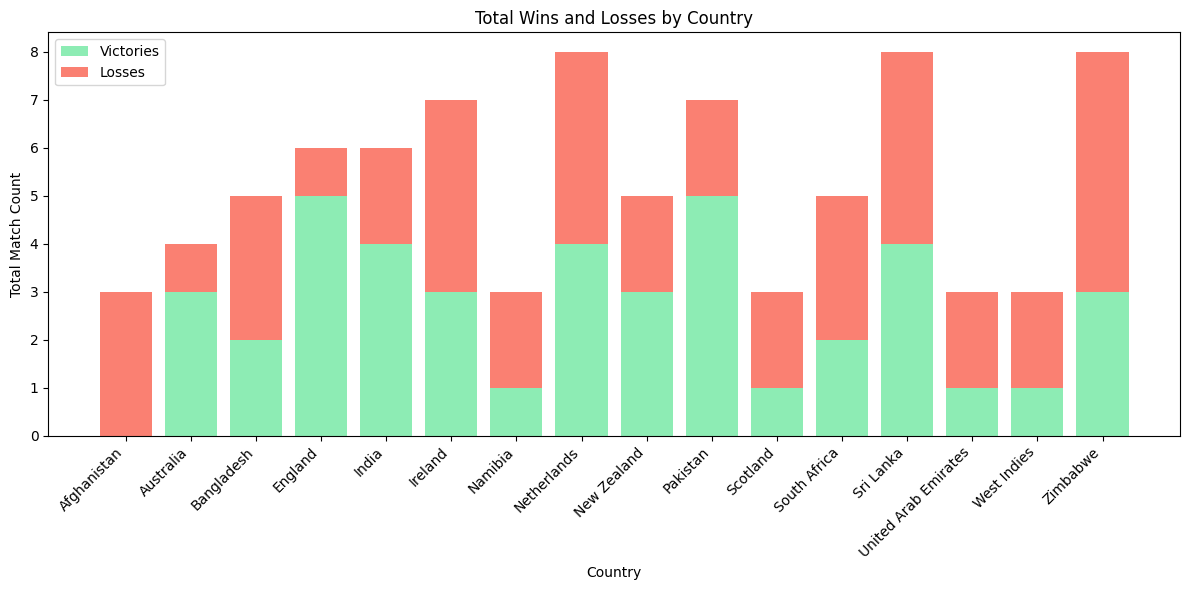

In [26]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))

# Plotting victories
plt.bar(results_df.index, results_df['Total Victories'], color='#8DECB4', label='Victories')
# Plotting losses
plt.bar(results_df.index, results_df['Total Losses'], color='salmon', label='Losses', bottom=results_df['Total Victories'])

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Match Count')
plt.title('Total Wins and Losses by Country')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Batting Performance Analysis

#### *Top 10 Most Runs in the Tournament by a Player*

In [27]:
# Adding maximum runs scored by each batsman in each match
top_scorers = df.groupby(['match_id', 'batsman1_name', 'current_innings'])['batsman1_runs'].max().reset_index()
# Then sum up the total runs scored by each batsman across all matches
top_scorers = top_scorers.groupby(['batsman1_name', 'current_innings'])['batsman1_runs'].sum().reset_index()

# Sorting the top scorers by total runs in descending order
top_scorers = top_scorers.sort_values(by='batsman1_runs', ascending=False).head(10)

# Renaming the column names
top_scorers = top_scorers.rename(columns={
    'batsman1_name': 'Player', 
    'current_innings': 'Country', 
    'batsman1_runs': 'Total Runs'})

# Reset index to start from 0
top_scorers.reset_index(drop=True, inplace=True)

# Displaying the top scorers
print("Top 10 Runs Scored in the Tournament:")
print(top_scorers)

Top 10 Runs Scored in the Tournament:
             Player      Country  Total Runs
0       Virat Kohli        India         296
1        Max O'Dowd  Netherlands         242
2  Suryakumar Yadav        India         233
3       Jos Buttler      England         225
4      Kusal Mendis    Sri Lanka         223
5     Sikandar Raza     Zimbabwe         219
6   Pathum Nissanka    Sri Lanka         214
7        Alex Hales      England         212
8     Lorcan Tucker      Ireland         204
9    Glenn Phillips  New Zealand         201


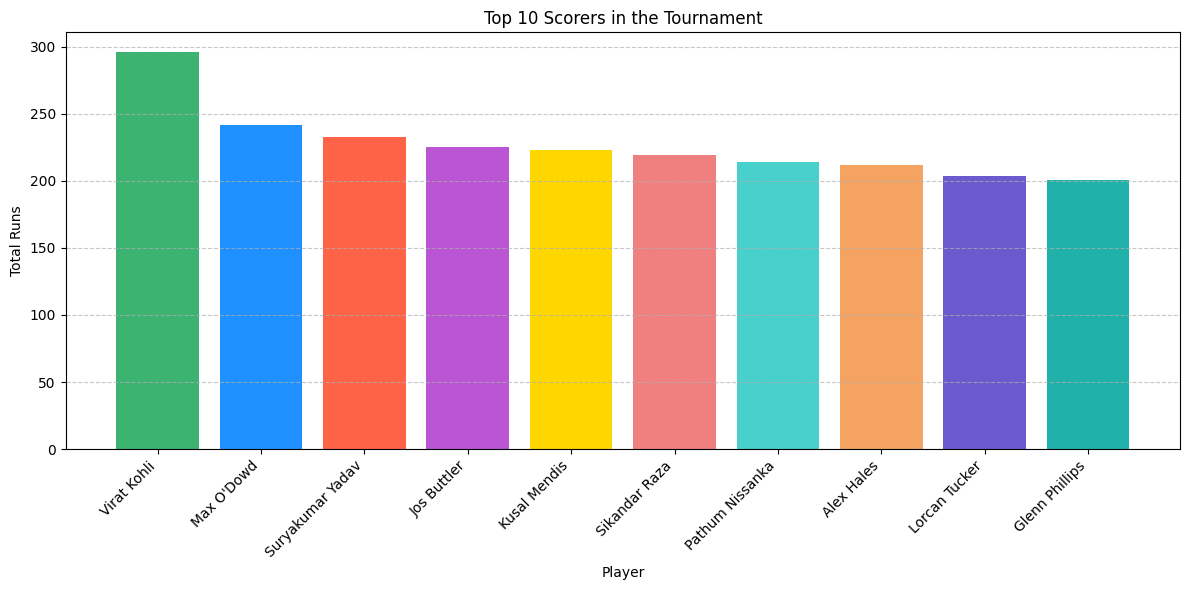

In [28]:
# Custom colors for bars
colors = ['mediumseagreen', 'dodgerblue', 'tomato', 'mediumorchid', 'gold', 
          'lightcoral', 'mediumturquoise', 'sandybrown', 'slateblue', 'lightseagreen']

# Plotting the top scorers with custom colors
plt.figure(figsize=(12, 6))
plt.bar(top_scorers['Player'], top_scorers['Total Runs'], color=colors)

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Top 10 Scorers in the Tournament')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### *Top 10 Highest Scores by a Player in Single Match*

In [29]:
# Then selecting the maximum runs scored by each batsman in each match
max_runs_per_player = df.groupby(['match_id', 'batsman1_name', 'current_innings'])['batsman1_runs'].max().reset_index()

# Mapping the country names from the 'current_innings' column
max_runs_per_player['Country'] = max_runs_per_player['current_innings']

# Fetching the corresponding number of balls faced by each batsman from the same row
max_runs_per_player['batsman1_balls'] = df.loc[df.groupby(['match_id', 'batsman1_name', 'current_innings'])['batsman1_runs'].idxmax(), 'batsman1_balls'].values

# Calculating the strike rate as runs scored divided by balls faced
max_runs_per_player['Strike Rate'] = ((max_runs_per_player['batsman1_runs'] / max_runs_per_player['batsman1_balls']) * 100).round(2)

# Sorting the players based on their maximum runs in descending order
top_players = max_runs_per_player.sort_values(by=['batsman1_runs','Strike Rate'], ascending=False).head(10)
top_players = top_players.rename(columns={'batsman1_name': 'Player', 'batsman1_runs': 'Runs'})
top_players = top_players[['Player', 'Country', 'Runs', 'Strike Rate']]
top_players.reset_index(drop=True, inplace=True)

# Displaying the top 10 players
print("Top 10 Players with Highest Runs in a Single Match:")
top_players

Top 10 Players with Highest Runs in a Single Match:


Player       Country  Runs  Strike Rate
0    Rilee Rossouw  South Africa   109       198.18
1   Glenn Phillips   New Zealand   104       165.08
2     Devon Conway   New Zealand    92       158.62
3       Alex Hales       England    86       182.98
4    Michael Jones      Scotland    86       159.26
5    Sikandar Raza      Zimbabwe    82       174.47
6      Virat Kohli         India    82       154.72
7      Jos Buttler       England    80       163.27
8     Kusal Mendis     Sri Lanka    79       183.72
9  Pathum Nissanka     Sri Lanka    74       125.42

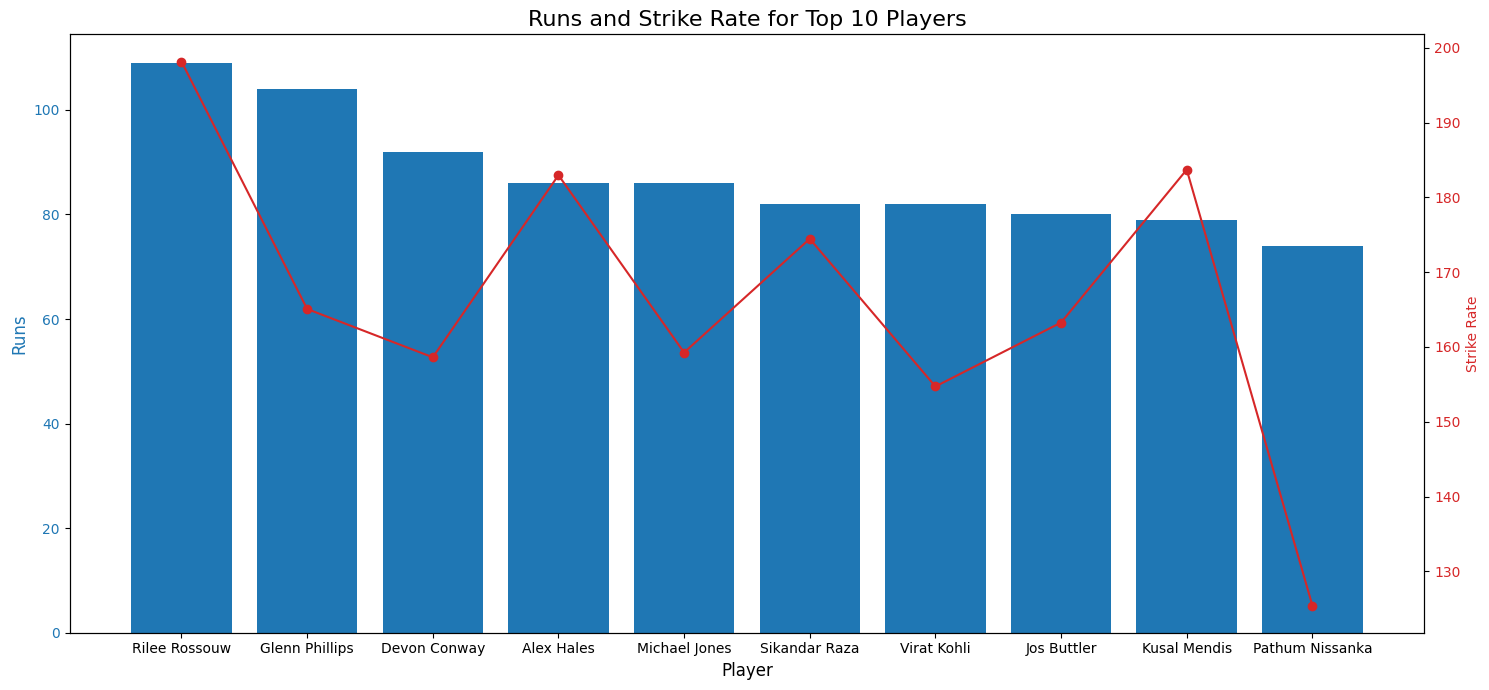

In [30]:
# Extracting player names, runs, and strike rates
players = top_players['Player']
runs = top_players['Runs']
strike_rate = top_players['Strike Rate']

# Plotting the bar chart for runs
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
ax1.set_xlabel('Player', fontsize= 12)
ax1.set_ylabel('Runs', color=color, fontsize= 12)
ax1.bar(players, runs, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for strike rate
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Strike Rate', color=color) 
ax2.plot(players, strike_rate, color=color, linestyle='-', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Adding title and rotating x-axis labels
plt.title('Runs and Strike Rate for Top 10 Players', fontsize= 16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()

### *Player with the Most Number of Sixes in the Tournament*

In [31]:
# Filter the DataFrame to include only rows where 'runs' column has values equal to 6 or 7
# and 'isBoundary' is 'True' and 'isWide' is 'False'
sixes_df = df[(df['runs'] == 6) | (df['runs'] == 7) & (df['isBoundary'] != False) & (df['isWide'] != True)]

# Group by 'batsman1_name' and count occurrences
sixes_count = sixes_df.groupby('batsman1_name').agg({'match_id': 'nunique', 'runs': 'count'}).reset_index()
sixes_count.rename(columns={'match_id': 'Matches Played', 'runs': 'Sixes'}, inplace=True)

# Merge with the original DataFrame to get the country name
sixes_count = sixes_count.merge(df[['batsman1_name', 'current_innings']], on='batsman1_name', how='left')

# Drop duplicates to ensure each player is mapped to a unique country
sixes_count.drop_duplicates(subset=['batsman1_name', 'current_innings'], inplace=True)

# Sorting the players based on the most number of sixes in descending order
sixes_count = sixes_count.sort_values(by='Sixes', ascending=False)
sixes_count.reset_index(drop=True, inplace=True)

# Renaming columns and selecting necessary columns
sixes_count = sixes_count.rename(columns={'batsman1_name': 'Player', 'current_innings': 'Country'})
sixes_count = sixes_count[['Player', 'Country', 'Matches Played', 'Sixes']]

print("Player with the Most Number of Sixes in the Tournament:")
print(sixes_count.head(10))

Player with the Most Number of Sixes in the Tournament:
             Player       Country  Matches Played  Sixes
0     Sikandar Raza      Zimbabwe               4     11
1        Alex Hales       England               4     10
2      Kusal Mendis     Sri Lanka               4     10
3    Andy Balbirnie       Ireland               4      9
4    Marcus Stoinis     Australia               3      9
5     Rilee Rossouw  South Africa               2      9
6          KL Rahul         India               3      8
7       Virat Kohli         India               4      8
8        Max O'Dowd   Netherlands               6      8
9  Suryakumar Yadav         India               4      8


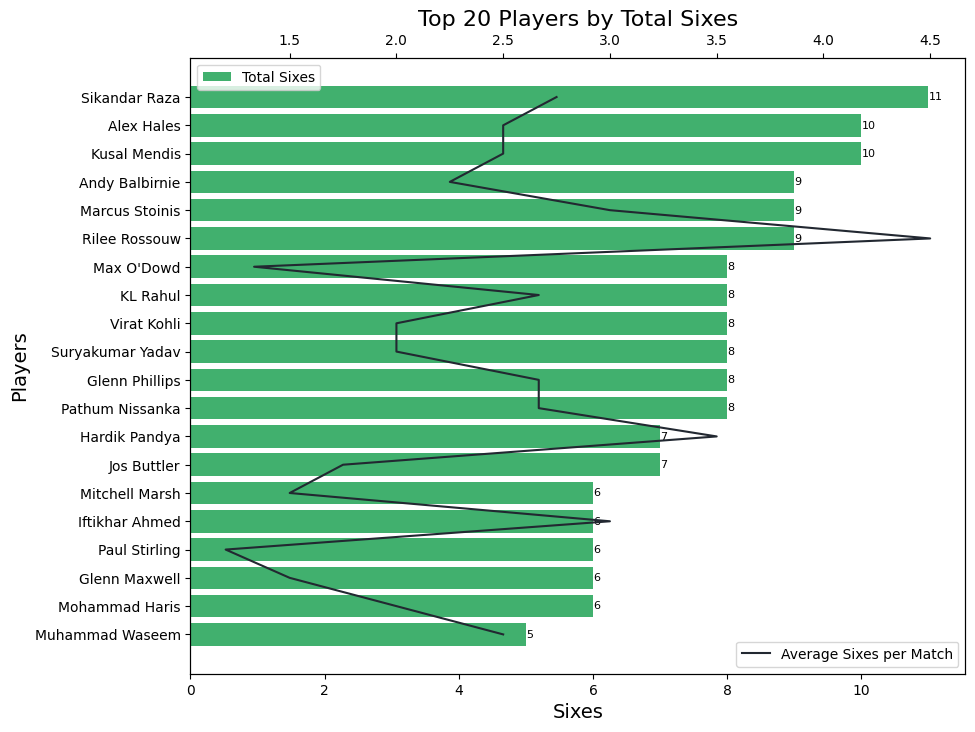

In [32]:
# Calculate average sixes per match
sixes_count['Average_Sixes_Per_Match'] = sixes_count['Sixes'] / sixes_count['Matches Played']

# Get the top 20 players based on the total number of sixes
top_20_sixes = sixes_count.nlargest(20, 'Sixes')
top_20_sixes = top_20_sixes.sort_values(by='Sixes', ascending=True)

# Plotting the horizontal bar chart
fig, ax1 = plt.subplots(figsize=(10, 8))

# Plotting the bar chart
bars = ax1.barh(top_20_sixes['Player'], top_20_sixes['Sixes'], color='#41B06E', label='Total Sixes')
ax1.set_xlabel('Sixes', fontsize = 14)
ax1.set_ylabel('Players', fontsize = 14)
ax1.set_title('Top 20 Players by Total Sixes', fontsize = 16)

# Add labels on each bar
for bar in bars:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left', fontsize=8, color='black')

# Creating a secondary y-axis for average sixes per match
ax2 = ax1.twiny()
ax2.plot(top_20_sixes['Average_Sixes_Per_Match'], top_20_sixes['Player'], color='#222831', 
         label='Average Sixes per Match')


ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

### *Player with the Most Number of Fours in the Tournament*

In [33]:
# Filter the DataFrame to include only rows where 'runs' column has values equal to 4 or 5
fours_df = df[((df['runs'] == 4) | (df['runs'] == 5)) & (df['isBoundary'] != False) & (df['isWide'] != True)]

# Group by 'batsman1_name' and count occurrences
fours_count = fours_df.groupby('batsman1_name').agg({'match_id': 'nunique', 'runs': 'count'}).reset_index()
fours_count.rename(columns={'match_id': 'Matches Played', 'runs': 'Fours'}, inplace=True)

# Merge with the original DataFrame to get the country name
fours_count = fours_count.merge(df[['batsman1_name', 'current_innings']], on='batsman1_name', how='left')

# Drop duplicates to ensure each player is mapped to a unique country
fours_count.drop_duplicates(subset=['batsman1_name', 'current_innings'], inplace=True)

# Sorting the players based on the most number of fours in descending order
fours_count = fours_count.sort_values(by='Fours', ascending=False)
fours_count.reset_index(drop=True, inplace=True)

# Renaming columns and selecting necessary columns
fours_count = fours_count.rename(columns={'batsman1_name': 'Player', 'current_innings': 'Country'})
fours_count = fours_count[['Player', 'Country', 'Matches Played', 'Fours']]

print("Player with the Most Number of Fours in the Tournament:")
print(fours_count.head(10))

Player with the Most Number of Fours in the Tournament:
                  Player      Country  Matches Played  Fours
0       Suryakumar Yadav        India               6     26
1            Virat Kohli        India               6     25
2            Jos Buttler      England               5     24
3             Max O'Dowd  Netherlands               6     22
4  Najmul Hossain Shanto   Bangladesh               5     20
5             Alex Hales      England               4     19
6         Glenn Phillips  New Zealand               5     19
7          Lorcan Tucker      Ireland               6     19
8           Kusal Mendis    Sri Lanka               7     17
9          George Munsey     Scotland               2     16


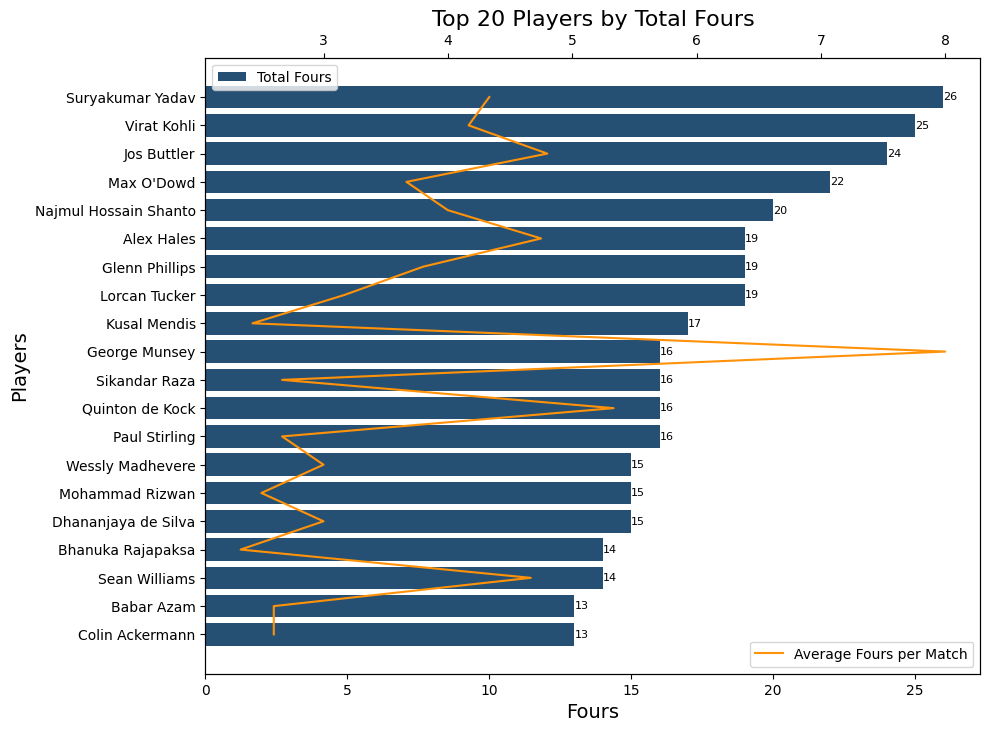

In [34]:
# Calculate average sixes per match
fours_count['Average_Fours_Per_Match'] = fours_count['Fours'] / fours_count['Matches Played']

# Get the top 20 players based on the total number of Fours
top_20_fours = fours_count.nlargest(20, 'Fours')
top_20_fours = top_20_fours.sort_values(by='Fours', ascending=True)

# Plotting the horizontal bar chart
fig, ax1 = plt.subplots(figsize=(10, 8))
bars = ax1.barh(top_20_fours['Player'], top_20_fours['Fours'], color='#265073', label='Total Fours')
ax1.set_xlabel('Fours', fontsize=14)
ax1.set_ylabel('Players', fontsize=14)
ax1.set_title('Top 20 Players by Total Fours', fontsize=16)

# Add labels on each bar
for bar in bars:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left', fontsize=8, color='black')

# Creating a secondary y-axis for average fours per match
ax2 = ax1.twiny()
ax2.plot(top_20_fours['Average_Fours_Per_Match'], top_20_fours['Player'], color='#FF9209', 
         label='Average Fours per Match')

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
plt.show()

### *Player with the Most Number of Boundaries in the Tournament*

In [35]:
# Filter the DataFrame to include only rows where 'runs' column has values equal to 4 or 5
boundaries_df = df[(df['runs'] >= 4) & (df['isBoundary'] != False)]

# Group by 'batsman1_name' and count occurrences
boundaries_count = boundaries_df.groupby('batsman1_name').agg({'match_id': 'nunique', 'runs': 'count'}).reset_index()
boundaries_count.rename(columns={'match_id': 'Matches Played', 'runs': 'Boundaries'}, inplace=True)

# Merge with the original DataFrame to get the country name
boundaries_count = boundaries_count.merge(df[['batsman1_name', 'current_innings']], on='batsman1_name', how='left')

# Drop duplicates to ensure each player is mapped to a unique country
boundaries_count.drop_duplicates(subset=['batsman1_name', 'current_innings'], inplace=True)

# Sorting the players based on the most number of Boundaries in descending order
boundaries_count = boundaries_count.sort_values(by='Boundaries', ascending=False)
boundaries_count.reset_index(drop=True, inplace=True)

# Renaming columns and selecting necessary columns
boundaries_count = boundaries_count.rename(columns={'batsman1_name': 'Player', 'current_innings': 'Country'})
boundaries_count = boundaries_count[['Player', 'Country', 'Matches Played', 'Boundaries']]

print("Player with the Most Number of Boundaries in the Tournament:")
print(boundaries_count.head(10))

Player with the Most Number of Boundaries in the Tournament:
                  Player      Country  Matches Played  Boundaries
0       Suryakumar Yadav        India               6          34
1            Virat Kohli        India               6          33
2            Jos Buttler      England               5          31
3             Max O'Dowd  Netherlands               7          30
4             Alex Hales      England               5          29
5         Glenn Phillips  New Zealand               5          27
6           Kusal Mendis    Sri Lanka               7          27
7          Sikandar Raza     Zimbabwe               6          27
8          Lorcan Tucker      Ireland               6          23
9  Najmul Hossain Shanto   Bangladesh               5          22


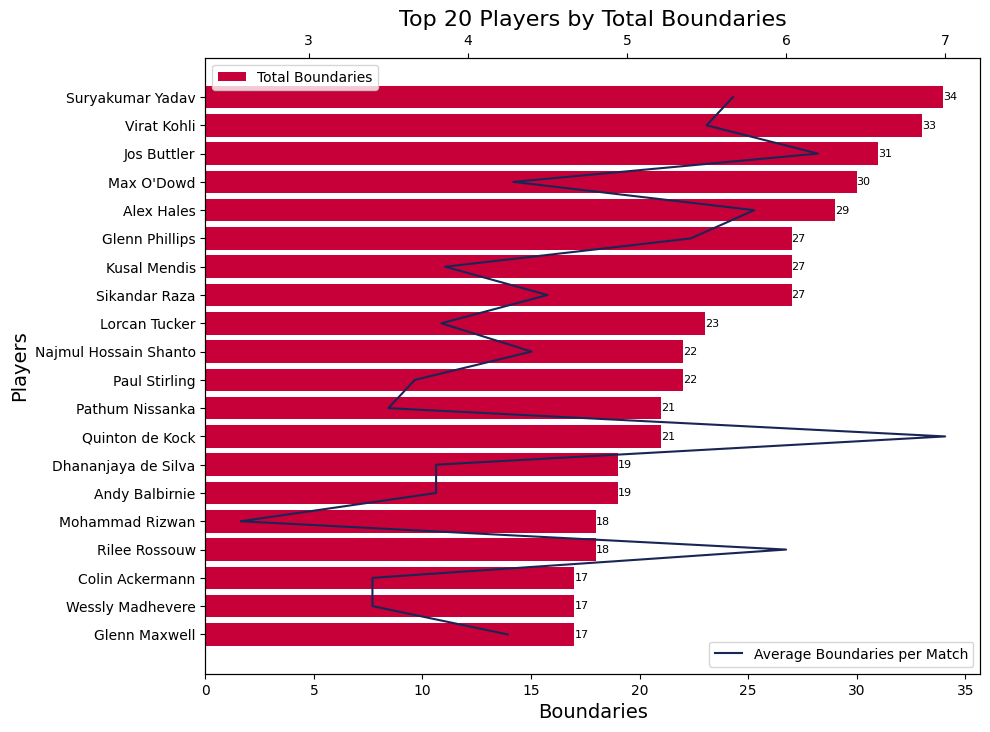

In [36]:
# Calculate average sixes per match
boundaries_count['Average_Boundaries_Per_Match'] = boundaries_count['Boundaries'] / boundaries_count['Matches Played']

# Get the top 20 players based on the total number of Boundaries
top_20_boundaries = boundaries_count.nlargest(20, 'Boundaries')
top_20_boundaries = top_20_boundaries.sort_values(by='Boundaries', ascending=True)

# Plotting the horizontal bar chart
fig, ax1 = plt.subplots(figsize=(10, 8))
bars = ax1.barh(top_20_boundaries['Player'], top_20_boundaries['Boundaries'], color='#C70039', label='Total Boundaries')
ax1.set_xlabel('Boundaries', fontsize=14)
ax1.set_ylabel('Players', fontsize=14)
ax1.set_title('Top 20 Players by Total Boundaries', fontsize=16)

# Add labels on each bar
for bar in bars:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left', fontsize=8, color='black')

# Creating a secondary y-axis for average Boundaries per match
ax2 = ax1.twiny()
ax2.plot(top_20_boundaries['Average_Boundaries_Per_Match'], top_20_boundaries['Player'], color='#192655', 
         label='Average Boundaries per Match')

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.show()

### *Player with the Highest Strike Rate in the Tournament (More then 30 Balls)*

In [37]:
# Grouping the data by 'match_id' and 'batsman1_name' and calculating the sum of maximum runs and balls faced
strike_rate_data = df.groupby(['match_id', 'current_innings','batsman1_name'])[['batsman1_runs', 'batsman1_balls']].max().reset_index()
strike_rate_data = strike_rate_data.groupby(['current_innings','batsman1_name']).sum().reset_index()

# Calculating the strike rate for each player
strike_rate_data['Strike Rate'] = ((strike_rate_data['batsman1_runs'] / strike_rate_data['batsman1_balls']) * 100).round(2)

# Sorting the players based on their strike rates and selecting the top 10
top_10_strike_rate = strike_rate_data.nlargest(10, 'Strike Rate')

# Merge with the 'current_innings' data to include the country of each player
top_10_strike_rate = strike_rate_data.merge(df[['match_id', 'batsman1_name', 'current_innings']], on=['match_id', 'batsman1_name'], how='left')

# Filter out the records where 'batsman1_balls' is more than 30
top_10_strike_rate = strike_rate_data[strike_rate_data['batsman1_balls'] > 30].nlargest(10, 'Strike Rate')
top_10_strike_rate.reset_index(drop=True, inplace=True)

# Renaming columns and selecting necessary columns
top_10_strike_rate = top_10_strike_rate.rename(columns={
    'batsman1_name': 'Player', 
    'current_innings': 'Country',
    'batsman1_runs': 'Runs', 
    'batsman1_balls': 'Balls',
    })

top_10_strike_rate = top_10_strike_rate[['Player', 'Country', 'Runs', 'Balls', 'Strike Rate']]
print("Top 10 Players by Strike Rate:")
top_10_strike_rate

Top 10 Players by Strike Rate:


Player       Country  Runs  Balls  Strike Rate
0  Suryakumar Yadav         India   233    125       186.40
1        Finn Allen   New Zealand    95     51       186.27
2       Rashid Khan   Afghanistan    57     32       178.12
3     Rilee Rossouw  South Africa   141     83       169.88
4       Shadab Khan      Pakistan    98     58       168.97
5    Curtis Campher       Ireland   126     77       163.64
6     Glenn Maxwell     Australia   118     73       161.64
7    Marcus Stoinis     Australia   126     78       161.54
8   Quinton de Kock  South Africa   124     77       161.04
9    Glenn Phillips   New Zealand   201    126       159.52

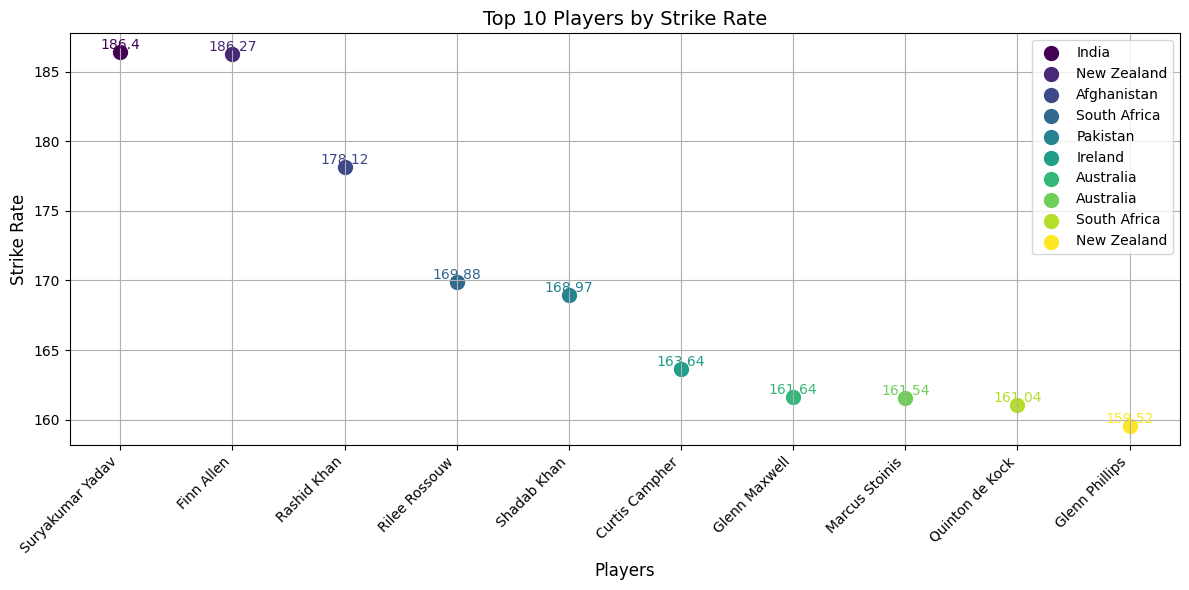

In [38]:
import numpy as np

# Data for visualization
players = top_10_strike_rate['Player']
strike_rates = top_10_strike_rate['Strike Rate']
countries = top_10_strike_rate['Country']

# Create a color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(players)))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the strike rates
for player, rate, country, color in zip(players, strike_rates, countries, colors):
    ax.scatter(player, rate, color=color, label=country, s=100)

# Adding labels and title
ax.set_xlabel('Players', fontsize=12)
ax.set_ylabel('Strike Rate', fontsize=12)
ax.set_title('Top 10 Players by Strike Rate', fontsize=14)

# Adding strike rate values as labels
for player, rate, color in zip(players, strike_rates, colors):
    ax.text(player, rate, f'{rate}', fontsize=10, ha='center', va='bottom', color=color)

plt.xticks(rotation=45, ha='right')
ax.grid(True) # Adding grid
ax.legend(loc='upper right') # Adding legend
plt.tight_layout()
plt.show()

### Bowling Performance Analysis

#### *Top 10 Most Wickets in the Tournament by a Player*

In [39]:
# Step 1: Grouping by 'match_id', 'bowler1_name', and 'is_bowler_wicket', then counting the occurrences of wickets
wickets = df.groupby(['match_id', 'bowler1_name', 'bowling_innings'])['is_bowler_wicket'].sum().reset_index()

# Step 2: Renaming the column to represent the number of wickets taken
wickets = wickets.rename(columns={'is_bowler_wicket': 'Wickets'})

# Step 3: Grouping by 'bowler1_name' and summing up the total wickets taken by each bowler
wickets = wickets.groupby('bowler1_name')['Wickets'].sum().reset_index()

# Step 4: Counting the total number of matches played by each bowler
matches_played = df.groupby('bowler1_name')['match_id'].nunique().reset_index()
matches_played = matches_played.rename(columns={'match_id': 'Matches Played'})

# Step 5: Calculating the economy rate for each bowler
economy_rate = df.groupby('bowler1_name')['runs'].sum() / (df.groupby('bowler1_name')['runs'].count() / 6)
economy_rate = economy_rate.reset_index()
economy_rate = economy_rate.rename(columns={'runs': 'Economy Rate'})

# Merging all the dataframes to get the final result
top_bowlers = pd.merge(wickets, matches_played, on='bowler1_name')
top_bowlers = pd.merge(top_bowlers, economy_rate, on='bowler1_name')

# Adding country name from 'bowling_innings'
top_bowlers = pd.merge(top_bowlers, df[['bowler1_name', 'bowling_innings']], left_on='bowler1_name', right_on='bowler1_name')
top_bowlers = top_bowlers.drop_duplicates(subset=['bowler1_name'])
top_bowlers = top_bowlers.rename(columns={'bowler1_name': 'Player', 'bowling_innings': 'Country'})

# Sorting the dataframe by the number of wickets in descending order and then by economy rate in ascending order
top_bowlers = top_bowlers.sort_values(by=['Wickets', 'Economy Rate'], ascending=[False, True])
top_bowlers.reset_index(drop=True, inplace=True)

# Rearrange columns
top_bowlers = top_bowlers[['Player', 'Country', 'Wickets', 'Matches Played', 'Economy Rate']]
print("Top Bowlers in the Tournament:")
top_bowlers.head(10)

Top Bowlers in the Tournament:


Player       Country  Wickets  Matches Played  \
0  Wanindu Hasaranga de Silva     Sri Lanka       14               8   
1                  Sam Curran       England       13               6   
2                Bas de Leede   Netherlands       13               7   
3         Blessing Muzarabani      Zimbabwe       12               7   
4               Anrich Nortje  South Africa       11               5   
5         Shaheen Shah Afridi      Pakistan       11               7   
6                 Shadab Khan      Pakistan       11               7   
7           Paul van Meekeren   Netherlands       11               8   
8                 Josh Little       Ireland       11               7   
9               Sikandar Raza      Zimbabwe       10               8   

   Economy Rate  
0      6.554348  
1      6.474820  
2      7.304348  
3      8.037037  
4      6.112150  
5      6.196078  
6      6.346154  
7      6.375000  
8      6.923077  
9      6.280000

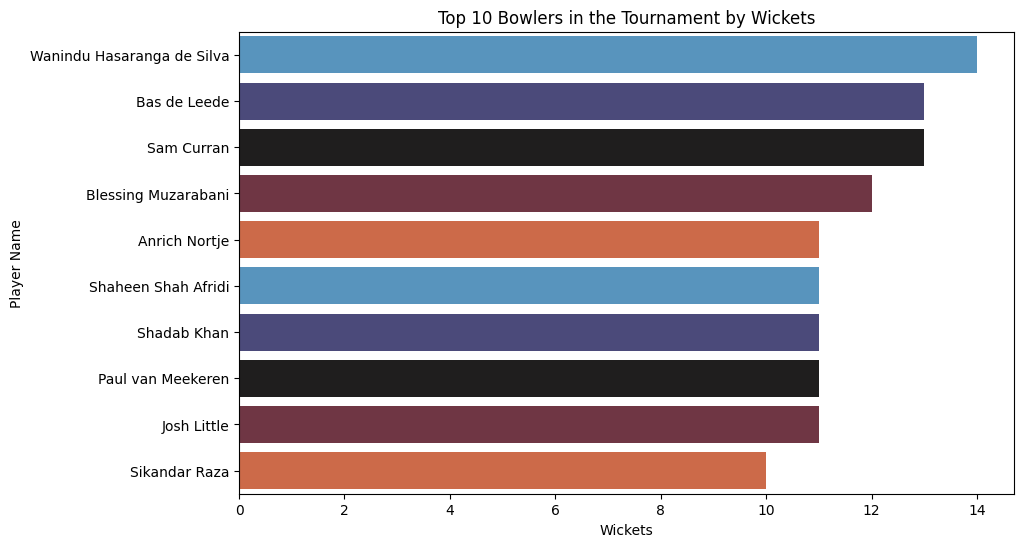

In [40]:
# Sorting the dataframe by the number of wickets in descending order
top_bowlers_sorted = top_bowlers.sort_values(by='Wickets', ascending=False)

# Selecting only the top 10 players
top_10_bowlers = top_bowlers_sorted.head(10)

# Create a color palette based on the number of unique values in the 'Wickets' column
num_unique_values = len(top_10_bowlers['Wickets'].unique())
color_palette = sns.color_palette("icefire", n_colors=num_unique_values)

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Wickets', y='Player', data=top_10_bowlers, palette=color_palette)

# Adding labels and title
plt.xlabel('Wickets')
plt.ylabel('Player Name')
plt.title('Top 10 Bowlers in the Tournament by Wickets')
plt.show()

#### *Top 10 Best Bowling Figures in Single Matches*

In [41]:
# Grouping the data by 'match_id', 'bowling_innings', and 'bowler1_name', and counting the occurrences of 'True' in 'is_bowler_wicket'
bowling_figures = df[df['is_bowler_wicket']].groupby(['match_id', 'bowling_innings', 'bowler1_name']).size().reset_index(name='Wickets')

# Grouping the data by 'match_id', 'bowling_innings', and 'bowler1_name', and getting the maximum runs from 'bowler1_runs'
max_runs_per_bowler = df.groupby(['match_id', 'bowling_innings', 'bowler1_name'])['bowler1_runs'].max().reset_index(name='Runs')

# Grouping the data by 'match_id' and 'bowler1_name', and getting the maximum value from 'bowler1_overs'
max_overs_per_match = df.groupby(['match_id', 'bowler1_name'])['bowler1_overs'].max().reset_index(name='Overs')

# Merging the two dataframes on 'match_id', 'bowling_innings', and 'bowler1_name'
bowling_figures = bowling_figures.merge(max_runs_per_bowler, on=['match_id', 'bowling_innings', 'bowler1_name'], how='left')

# Merging with the dataframe containing the maximum overs per match
bowling_figures = bowling_figures.merge(max_overs_per_match, on=['match_id', 'bowler1_name'], how='left')

# Calculating the Economy Rate as runs conceded divided by total overs bowled
# Convert 'Max Overs' to string and split integer and fractional parts
overs_split = bowling_figures['Overs'].astype(str).str.split('.', n=1)
integer_part = overs_split.str[0].astype(float)
fractional_part = overs_split.str[1].astype(int)

# Perform calculations
total_overs = (integer_part * 6 + fractional_part) / 6
bowling_figures['Economy'] = bowling_figures['Runs'] / total_overs
bowling_figures['Economy'] = bowling_figures['Economy'].round(2)


# Sorting the bowling figures in descending order of wickets
bowling_figures = bowling_figures.sort_values(by=['Wickets', 'Runs', 'Economy'], ascending=[False, True, True])

# Getting the top 10 bowling figures for each 'match_id' and 'bowling_innings'
top_bowling_figures = bowling_figures.groupby(['match_id', 'bowling_innings']).head(10)
top_bowling_figures.reset_index(drop=True, inplace=True)

top_bowling_figures = top_bowling_figures.rename(columns={'bowler1_name': 'Player', 'bowling_innings': 'Country'})
top_bowling_figures = top_bowling_figures[['Player', 'Country', 'Wickets', 'Runs', 'Overs','Economy']]

print("Top 10 Bowling Figures:")
top_bowling_figures.head(10)

Top 10 Bowling Figures:


Player       Country  Wickets  Runs  Overs  Economy
0           Sam Curran       England        5    10    3.4     2.73
1        Anrich Nortje  South Africa        4    10    3.3     2.86
2          Trent Boult   New Zealand        4    13    4.0     3.25
3       Alzarri Joseph   West Indies        4    16    4.0     4.00
4  Shaheen Shah Afridi      Pakistan        4    22    4.0     5.50
5       Mohammad Wasim      Pakistan        4    22    3.5     5.74
6         Taskin Ahmed    Bangladesh        4    25    4.0     6.25
7          Lungi Ngidi  South Africa        4    29    4.0     7.25
8        Anrich Nortje  South Africa        4    41    4.0    10.25
9          Tim Southee   New Zealand        3     6    2.1     2.77

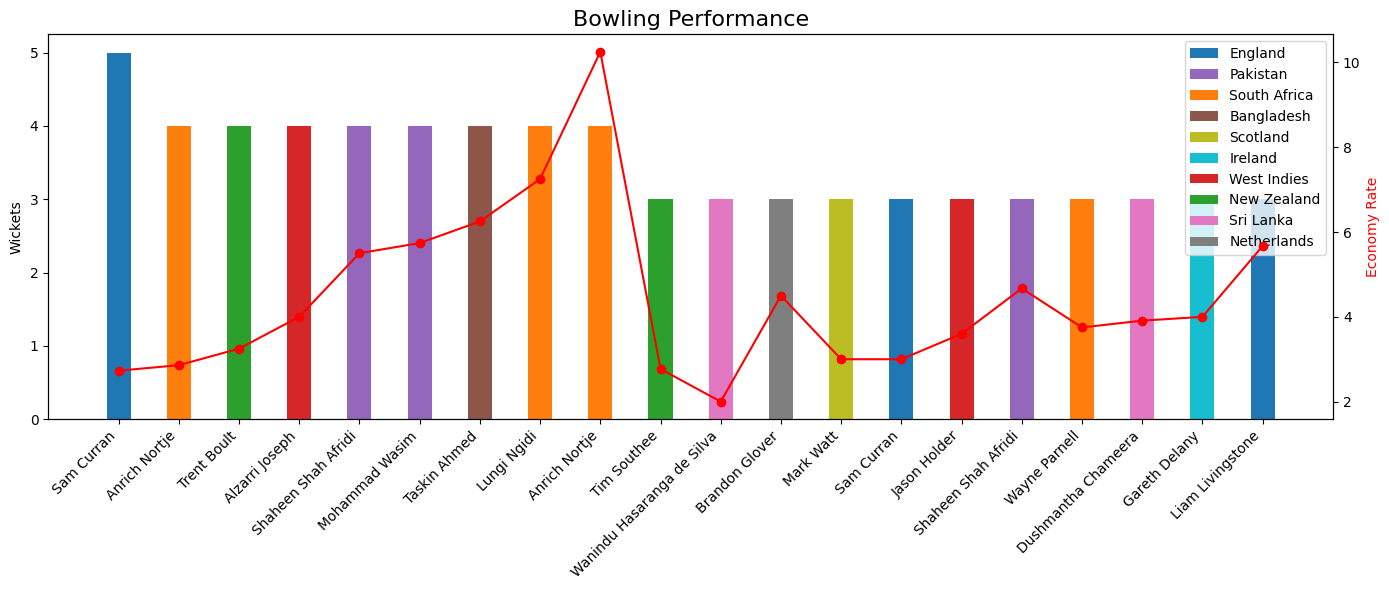

In [42]:
# Create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 6))
top_bowling_figures = top_bowling_figures.head(20)
unique_countries = top_bowling_figures['Country'].unique()

# Create a dictionary to map unique countries to colors
color_dict = {country: plt.cm.tab10(i) for i, country in enumerate(unique_countries)}

# Plotting wickets with bar chart
bar_width = 0.4  # Width of bars
bar_positions = range(len(top_bowling_figures))
for i, player in enumerate(top_bowling_figures['Player']):
    country = top_bowling_figures.loc[i, 'Country']
    color = color_dict[country]
    ax1.bar(i, top_bowling_figures.loc[i, 'Wickets'], color=color, label=country, width=bar_width)

# Set x-axis ticks and labels
ax1.set_xticks(range(len(top_bowling_figures)))
ax1.set_xticklabels(top_bowling_figures['Player'], rotation=45, ha='right')

# Set y-axis label for wickets
ax1.set_ylabel('Wickets')

# Create secondary y-axis for economy rate with line chart
ax2 = ax1.twinx()
ax2.plot(bar_positions, top_bowling_figures['Economy'], color='r', marker='o', label='Economy Rate')
ax2.set_ylabel('Economy Rate', color='r')

# Adding legend
handles, labels = ax1.get_legend_handles_labels()
unique_labels = list(set(labels))  # Get unique country labels
unique_handles = [handles[labels.index(label)] for label in unique_labels]  # Get corresponding handles
ax1.legend(unique_handles, unique_labels, loc='upper right')
plt.title('Bowling Performance', fontsize =16) # Adding title
plt.tight_layout()
plt.show()

#### *Top Bowlers with Most Dot Balls In All Maches*

In [43]:
# Calculate economy rate for all bowlers
economy_df = df.copy()
economy_df['runs'] = economy_df.apply(lambda x: 0 if x['isWide'] or x['isNoball'] else x['runs'], axis=1)
economy_df = economy_df.groupby('bowler1_name').agg({'runs': 'sum', 'isWide': 'count'}).reset_index()
economy_df['Economy'] = (economy_df['runs'] / (economy_df['isWide'] / 6)).round(2)

# Filter the DataFrame to include only rows where 'runs' column has values equal to 0
dot_balls_df = df[df['runs'] == 0]

# Group by 'bowler1_name' and count occurrences
dot_balls_count = dot_balls_df.groupby('bowler1_name').size().reset_index(name='Dot Balls')

# Merge with the original DataFrame to get the country name
dot_balls_count = dot_balls_count.merge(df[['bowler1_name', 'bowling_innings']], on='bowler1_name', how='left')

# Drop duplicates to ensure each bowler is mapped to a unique country
dot_balls_count.drop_duplicates(subset=['bowler1_name', 'bowling_innings'], inplace=True)

# Sorting the bowlers based on the most number of dot balls in descending order
dot_balls_count = dot_balls_count.sort_values(by='Dot Balls', ascending=False)
dot_balls_count.reset_index(drop=True, inplace=True)

# Renaming columns and selecting necessary columns
dot_balls_count = dot_balls_count.rename(columns={'bowler1_name': 'Player', 'bowling_innings': 'Country'})
dot_balls_count = dot_balls_count[['Player', 'Country', 'Dot Balls']]

# Merge with the economy data
dot_balls_count = dot_balls_count.merge(economy_df[['bowler1_name', 'Economy']], left_on='Player', right_on='bowler1_name', how='left')
dot_balls_count.drop(columns=['bowler1_name'], inplace=True)

print("Players with the Most Number of Dot Balls and their Economy in the Tournament:")
print(dot_balls_count.head(10))

Players with the Most Number of Dot Balls and their Economy in the Tournament:
                       Player      Country  Dot Balls  Economy
0               Fred Klaassen  Netherlands         89     5.87
1             Richard Ngarava     Zimbabwe         83     6.47
2           Paul van Meekeren  Netherlands         80     6.06
3  Wanindu Hasaranga de Silva    Sri Lanka         71     6.55
4          Maheesh Theekshana    Sri Lanka         68     6.00
5                 Naseem Shah     Pakistan         68     6.00
6         Shaheen Shah Afridi     Pakistan         67     6.12
7           Bhuvneshwar Kumar        India         66     5.79
8                  Sam Curran      England         64     6.30
9                 Josh Little      Ireland         64     6.64


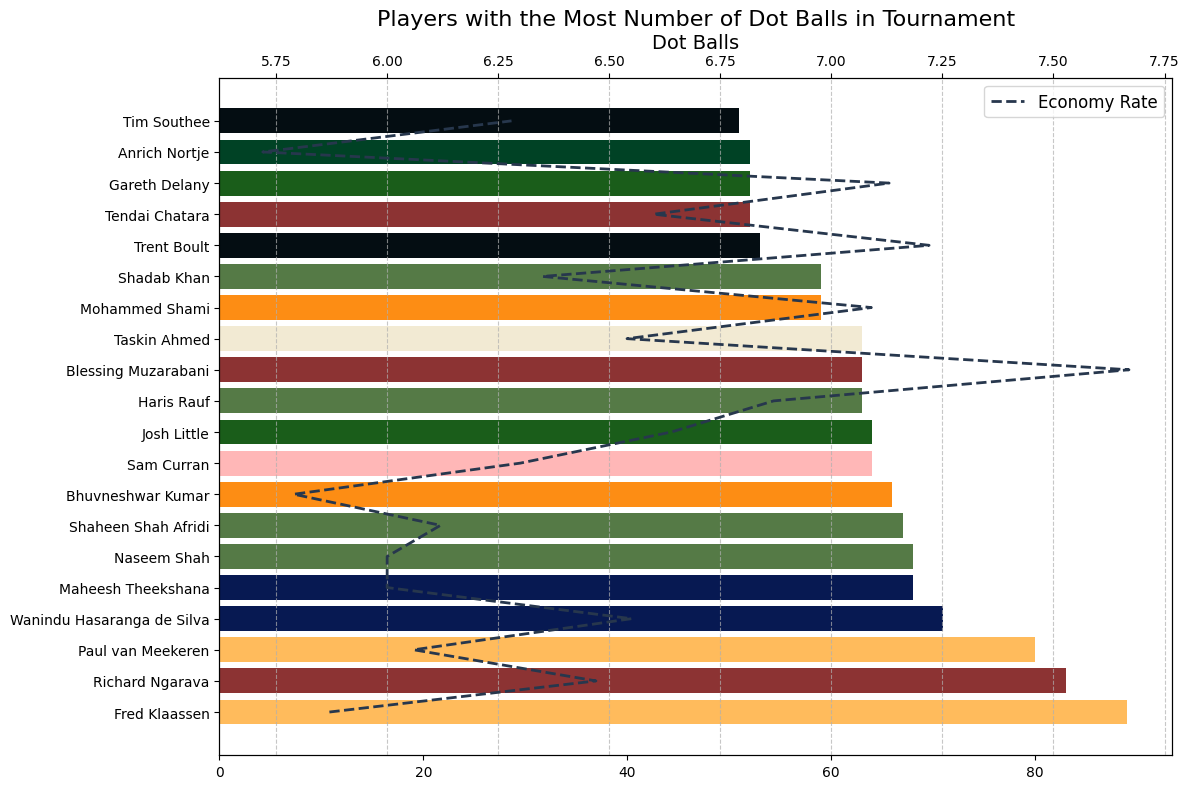

In [44]:
## Visualizing graph for top 20 bowlers with most dot balls
dot_balls_count = dot_balls_count.head(20)

# Define colors for each country'
country_colors = {
    'Afghanistan': '#BB2525',
    'Australia': '#FFC436',
    'Bangladesh': '#F2EAD3',
    'England': '#FFB7B7',
    'India': '#FD8D14',
    'Ireland': '#1A5D1A',
    'Namibia': '#45CFDD',
    'Netherlands': '#FFBB5C',
    'New Zealand': '#040D12',
    'Pakistan': '#557A46',
    'Scotland': '#3085C3',
    'South Africa': '#004225',
    'Sri Lanka': '#071952',
    'United Arab Emirates' : '#26577C',
    'West Indies': '#862B0D',
    'Zimbabwe': '#8C3333',
}

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 8))

# Iterate over each row and plot bars with country labels
for i, (player, dot_balls, country) in enumerate(zip(dot_balls_count['Player'], dot_balls_count['Dot Balls'], dot_balls_count['Country'])):
    plt.barh(player, dot_balls, color=country_colors[country])

# Creating a secondary x-axis for Economy Rate
ax2 = plt.twiny()
ax2.plot(dot_balls_count['Economy'], dot_balls_count['Player'], color='#27374D', linestyle='--', linewidth=2, label='Economy Rate')

ax2.set_xlabel('Economy', fontsize=14)
plt.xlabel('Dot Balls', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.title('Players with the Most Number of Dot Balls in Tournament', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12) # Display the legend
plt.tight_layout()
plt.show()

#### *Top Bowlers with Most Dot Balls in Individual Matches*

In [45]:
# Initialize an empty DataFrame to store the results
top_dot_balls_per_match = pd.DataFrame()

# Iterate over each unique match_id
for match_id in df['match_id'].unique():
    # Filter the DataFrame by the current match_id
    match_df = df[df['match_id'] == match_id]

    # Calculate economy rate for all bowlers in the current match
    economy_df = match_df.copy()
    economy_df['runs'] = economy_df.apply(lambda x: 0 if x['isWide'] or x['isNoball'] else x['runs'], axis=1)
    economy_df = economy_df.groupby('bowler1_name').agg({'runs': 'sum', 'isWide': 'count'}).reset_index()
    economy_df['Economy'] = (economy_df['runs'] / (economy_df['isWide'] / 6)).round(2)

    # Filter the DataFrame to include only rows where 'runs' column has values equal to 0
    dot_balls_df = match_df[match_df['runs'] == 0]

    # Group by 'bowler1_name' and count occurrences
    dot_balls_count = dot_balls_df.groupby('bowler1_name').size().reset_index(name='Dot Balls')

    # Merge with the original DataFrame to get the country name
    dot_balls_count = dot_balls_count.merge(match_df[['bowler1_name', 'bowling_innings']], on='bowler1_name', how='left')

    # Drop duplicates to ensure each bowler is mapped to a unique country
    dot_balls_count.drop_duplicates(subset=['bowler1_name', 'bowling_innings'], inplace=True)

    # Sorting the bowlers based on the most number of dot balls in descending order
    dot_balls_count = dot_balls_count.sort_values(by='Dot Balls', ascending=False)
    dot_balls_count.reset_index(drop=True, inplace=True)

    # Renaming columns and selecting necessary columns
    dot_balls_count = dot_balls_count.rename(columns={'bowler1_name': 'Player', 'bowling_innings': 'Country'})
    dot_balls_count = dot_balls_count[['Player', 'Country', 'Dot Balls']]

    # Merge with the economy data
    dot_balls_count = dot_balls_count.merge(economy_df[['bowler1_name', 'Economy']], left_on='Player', right_on='bowler1_name', how='left')
    dot_balls_count.drop(columns=['bowler1_name'], inplace=True)
    dot_balls_count = dot_balls_count.sort_values(by=['Dot Balls', 'Economy'], ascending=[False,True])

    # Append the result for the current match to the final DataFrame
    top_dot_balls_per_match = pd.concat([top_dot_balls_per_match, dot_balls_count.head(10)], ignore_index=True)

# Display the top bowlers by dot balls for each match
print("Top Bowlers by Dot Balls for Each Match:")
print(top_dot_balls_per_match.head(10))

Top Bowlers by Dot Balls for Each Match:
                Player   Country  Dot Balls  Economy
0           Sam Curran   England         15     3.00
1          Naseem Shah  Pakistan         15     6.00
2           Haris Rauf  Pakistan         13     5.28
3          Shadab Khan  Pakistan         10     5.00
4          Adil Rashid   England         10     5.04
5         Chris Jordan   England          8     6.27
6         Chris Woakes   England          7     7.20
7  Shaheen Shah Afridi  Pakistan          5     6.46
8           Ben Stokes   England          5     6.67
9       Mohammad Wasim  Pakistan          5     8.31


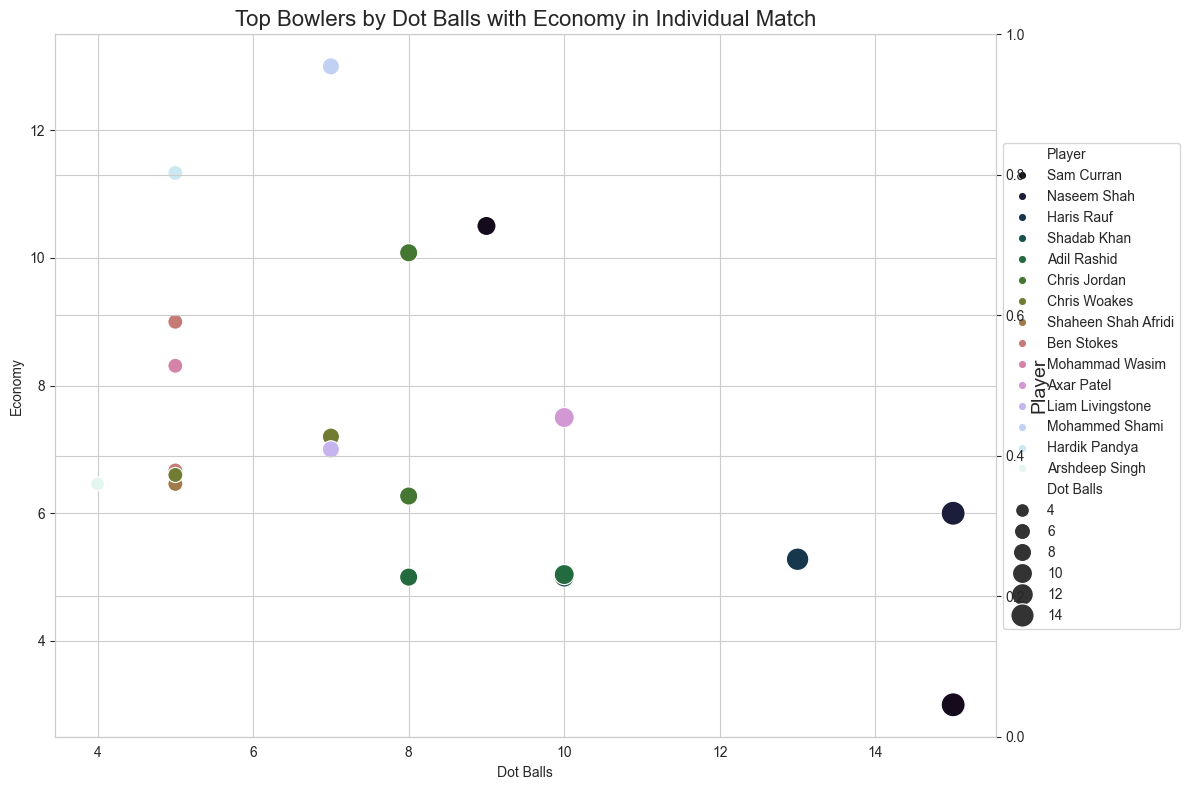

In [46]:
# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create a scatter plot for dot balls vs. economy
scatter = sns.scatterplot(data=top_dot_balls_per_match.head(20), x='Dot Balls', y='Economy', 
                hue='Player', size='Dot Balls', sizes=(100, 300), palette='cubehelix')

# Set the secondary y-axis for economy
ax2 = plt.gca().twinx()
ax2.set_ylabel('Economy', fontsize=14)

# Set the labels and title
plt.xlabel('Dot Balls', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.title('Top Bowlers by Dot Balls with Economy in Individual Match', fontsize=16)
# Move the legend outside the plot
scatter.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.tight_layout()
plt.show()

### Runs Analysis

#### *Histogram of Unique Value of Runs Scored*

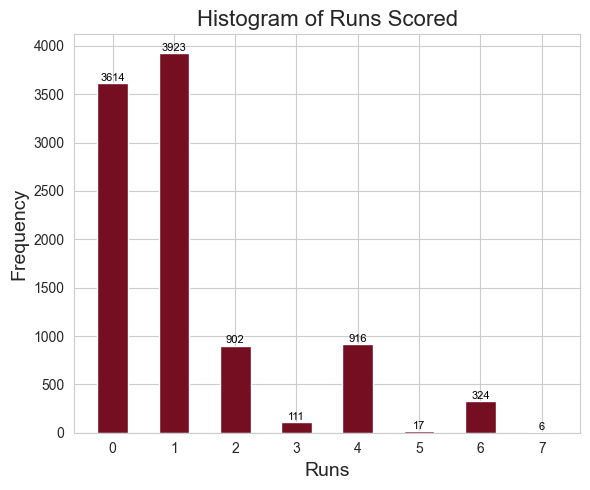

In [47]:
# Get unique runs values
unique_runs = sorted(df['runs'].unique())

# Plotting the histogram
plt.figure(figsize=(6, 5))
counts, bins, _ = plt.hist(df['runs'], bins=unique_runs + [unique_runs[-1] + 1], align='left', rwidth=0.5, color='#750E21')
plt.xlabel('Runs', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Runs Scored', fontsize=16)

# Adding count levels on the bars
for i, count in enumerate(counts):
    plt.text(unique_runs[i], count + 0.5, str(int(count)), ha='center', va='bottom', color='black', fontsize=8)

plt.grid(True)
plt.xticks(unique_runs) 
plt.tight_layout()
plt.show()

#### *Over-wise Total Runs in Tournament*

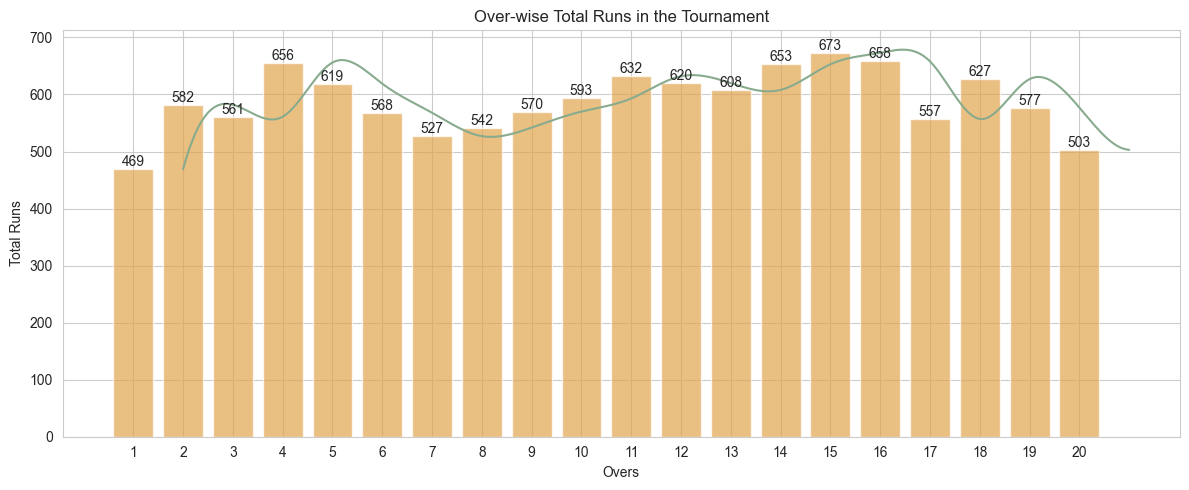

In [48]:
from scipy.interpolate import make_interp_spline

# Group data by 'over' and sum the 'runs' for each over
runs_data = df.groupby('over')['runs'].sum().reset_index()

# Plot bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.barplot(x='over', y='runs', data=runs_data, color='#FBA834', alpha=0.7)

# Smooth the line plot using cubic spline interpolation
smooth_line = make_interp_spline(runs_data['over'], runs_data['runs'], k=3)
over_smooth = np.linspace(runs_data['over'].min(), runs_data['over'].max(), 300)
wicket_smooth = smooth_line(over_smooth)

# Plot curve plot
plt.plot(over_smooth, wicket_smooth, color='#88AB8E')

# Add level at each bar
for index, value in enumerate(runs_data['runs']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Overs')
plt.ylabel('Total Runs')
plt.title('Over-wise Total Runs in the Tournament')
plt.grid(True)
plt.tight_layout()
plt.show()

#### *Over-wise Total Runs in the Tournament(First Inninga and Second Inning comparision)*

In [49]:
# Filter data for the first innings
first_innings_data = df[df['innings_id'] == 1]
second_innings_data = df[df['innings_id'] == 2]

# Group by over and calculate sum of runs for each over
over_wise_sum1 = first_innings_data.groupby('over')['runs'].sum().reset_index()
over_wise_sum2 = second_innings_data.groupby('over')['runs'].sum().reset_index()

In [50]:
# Set thebars
bar_width = 0.35
plt.figure(figsize=(14, 6))

index = np.arange(len(over_wise_sum1)) # Set the x locations for the groups
plt.bar(index, over_wise_sum1['runs'], bar_width, color='#163020', 
        alpha=0.7, label='First Innings', edgecolor='#12372A') # Plot the first innings data
plt.bar(index + bar_width, over_wise_sum2['runs'], bar_width, color='#750E21', 
        alpha=0.7, label='Second Innings', edgecolor='#12372A') # Plot the second innings data

# Add labels and title
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Over-wise Total Runs in First and Second Innings')
plt.xticks(index + bar_width / 2, over_wise_sum1['over'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### *Over-wise Average Runs in the Tournament(First Inninga and Second Inning comparision)*

In [51]:
# Calculate the total number of matches
total_matches1 = first_innings_data['match_id'].nunique()
total_matches2 = second_innings_data['match_id'].nunique()

# Calculate average runs per over across all matches for both innings
over_wise_sum1['Average Runs 1'] = over_wise_sum1['runs'] / total_matches1
over_wise_sum2['Average Runs 2'] = over_wise_sum2['runs'] / total_matches2

# Merge the two DataFrames on the 'over' column
over_wise_sum = pd.merge(over_wise_sum1, over_wise_sum2, on='over', how='outer')

# Reindex to include all overs from 1 to 20
over_wise_sum = over_wise_sum.reindex(range(0, 20), fill_value=0)
over_wise_sum = over_wise_sum[['over', 'Average Runs 1', 'Average Runs 2']]

# Display the result
print("Over-wise Average Runs:")
print(over_wise_sum)

Over-wise Average Runs:
    over  Average Runs 1  Average Runs 2
0      1        4.880952        6.285714
1      2        6.761905        7.095238
2      3        7.071429        6.285714
3      4        8.285714        7.333333
4      5        7.380952        7.357143
5      6        6.857143        6.666667
6      7        6.119048        6.428571
7      8        6.666667        6.238095
8      9        7.404762        6.166667
9     10        7.452381        6.666667
10    11        7.833333        7.214286
11    12        7.428571        7.333333
12    13        8.214286        6.261905
13    14        8.214286        7.333333
14    15        8.452381        7.571429
15    16        8.095238        7.571429
16    17        7.571429        5.690476
17    18        8.714286        6.214286
18    19        8.857143        4.880952
19    20        8.404762        3.571429


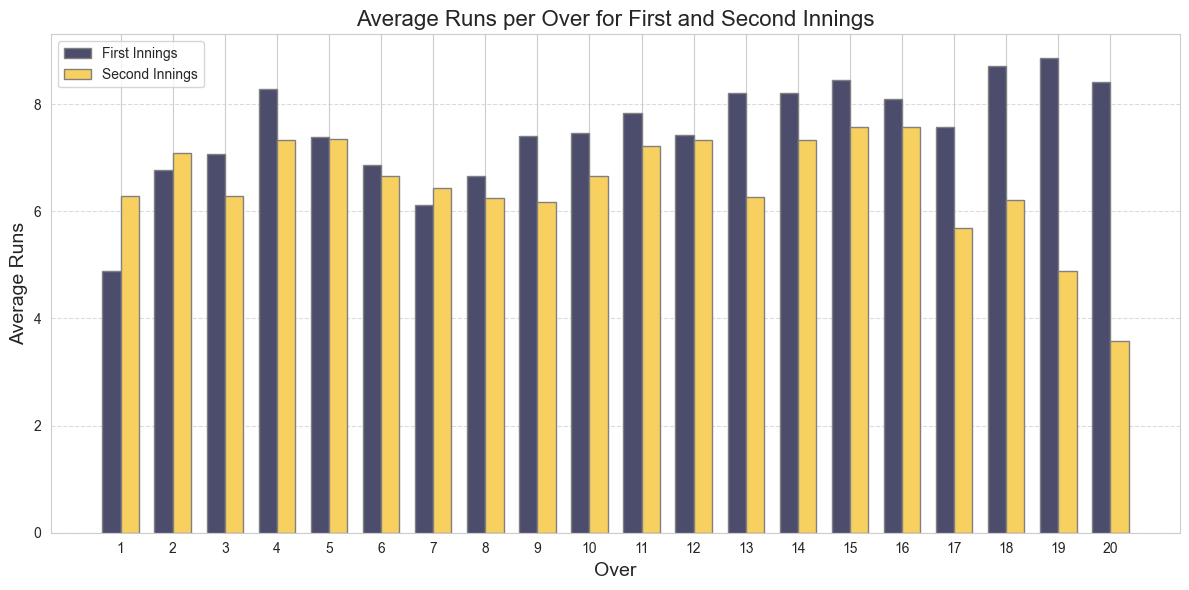

In [52]:
# Define the overs
overs = range(1, 21)
# Define the data for both innings
average_runs_first = over_wise_sum['Average Runs 1']
average_runs_second = over_wise_sum['Average Runs 2']

# Set the width of the bars
bar_width = 0.35
# Set the position of the bars on the x-axis
r1 = np.arange(len(overs))
r2 = [x + bar_width for x in r1]

# Plotting the side-by-side bar graphs
plt.figure(figsize=(12, 6))
plt.bar(r1, average_runs_first, color='#4C4C6D', width=bar_width, edgecolor='grey', label='First Innings')
plt.bar(r2, average_runs_second, color='#F7D060', width=bar_width, edgecolor='grey', label='Second Innings')
plt.xlabel('Over', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.title('Average Runs per Over for First and Second Innings', fontsize=16)
plt.xticks([r + bar_width/2 for r in range(len(overs))], overs)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### *Over-wise Overall Average Runs in the Tournament*

In [53]:
# Filter data for the first and second innings
first_innings_data = df[df['innings_id'] == 1]
second_innings_data = df[df['innings_id'] == 2]

# Group by over and calculate cumulative sum of runs for each over for the first innings
over_wise_sum_first = first_innings_data.groupby('over')['runs'].sum().reset_index()
over_wise_sum_first['Cumulative Sum 1'] = over_wise_sum_first['runs'].cumsum()

# Group by over and calculate cumulative sum of runs for each over for the second innings
over_wise_sum_second = second_innings_data.groupby('over')['runs'].sum().reset_index()
over_wise_sum_second['Cumulative Sum 2'] = over_wise_sum_second['runs'].cumsum()

# Calculate the total number of matches for the first and second innings
total_matches_first = first_innings_data['match_id'].nunique() 
total_matches_second = second_innings_data['match_id'].nunique()

# Calculate average sum after each over for the first and second innings
over_wise_sum_first['Average Runs 1'] = over_wise_sum_first['Cumulative Sum 1'] / total_matches_first
over_wise_sum_second['Average Runs 2'] = over_wise_sum_second['Cumulative Sum 2'] / total_matches_second

# Merge the two DataFrames on the 'over' column
over_wise_sum = pd.merge(over_wise_sum_first, over_wise_sum_second, on='over', how='outer')

# Reindex to include all overs from 1 to 20
over_wise_sum = over_wise_sum.reindex(range(0, 20), fill_value=0)
over_wise_sum = over_wise_sum[['over', 'Average Runs 1', 'Average Runs 2']]

# Display the result
print("Over-wise Average Runs:")
print(over_wise_sum)

Over-wise Average Runs:
    over  Average Runs 1  Average Runs 2
0      1        4.880952        6.285714
1      2       11.642857       13.380952
2      3       18.714286       19.666667
3      4       27.000000       27.000000
4      5       34.380952       34.357143
5      6       41.238095       41.023810
6      7       47.357143       47.452381
7      8       54.023810       53.690476
8      9       61.428571       59.857143
9     10       68.880952       66.523810
10    11       76.714286       73.738095
11    12       84.142857       81.071429
12    13       92.357143       87.333333
13    14      100.571429       94.666667
14    15      109.023810      102.238095
15    16      117.119048      109.809524
16    17      124.690476      115.500000
17    18      133.404762      121.714286
18    19      142.261905      126.595238
19    20      150.666667      130.166667


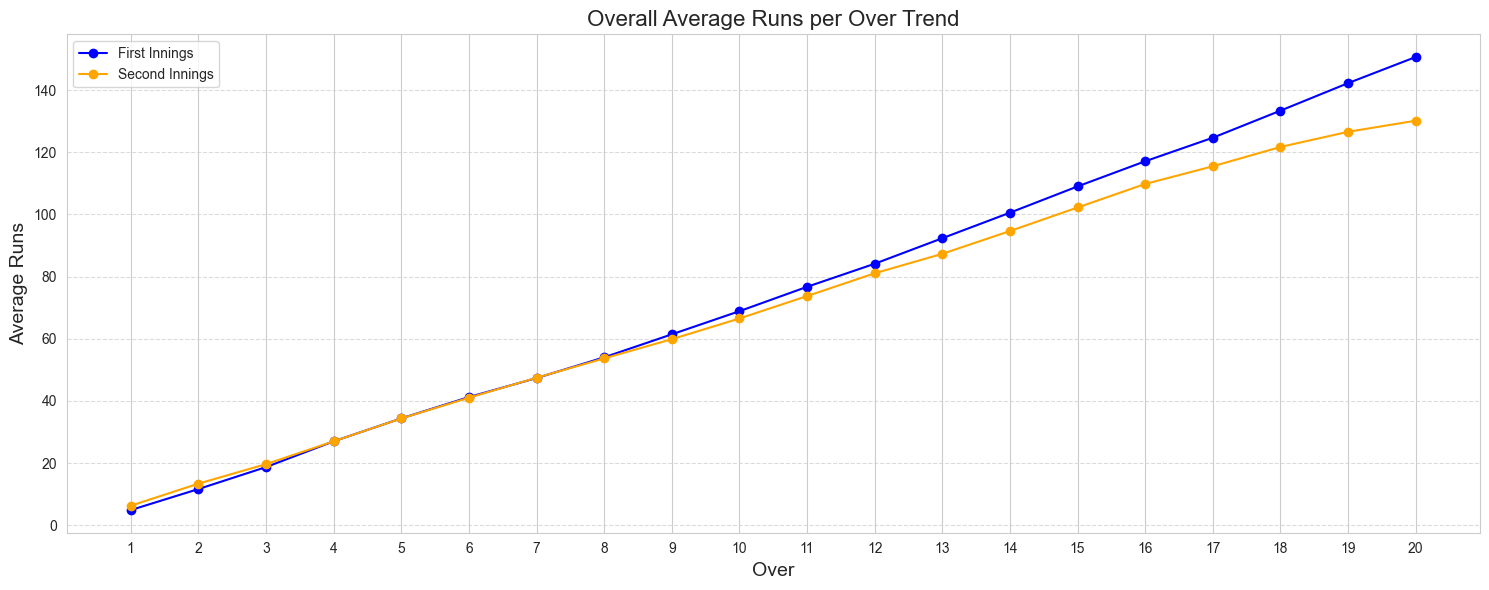

In [54]:
# Plotting the line chart
plt.figure(figsize=(15, 6))

# Plotting Average Runs for the first innings
plt.plot(over_wise_sum['over'], over_wise_sum['Average Runs 1'], marker='o', color='blue', label='First Innings')

# Plotting Average Runs for the second innings
plt.plot(over_wise_sum['over'], over_wise_sum['Average Runs 2'], marker='o', color='orange', label='Second Innings')

# Adding labels and title
plt.xlabel('Over', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.title('Overall Average Runs per Over Trend', fontsize=16)
plt.xticks(range(1, 21))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Wicket Analysis

#### *Over-wise Total Wickets in Tournament*

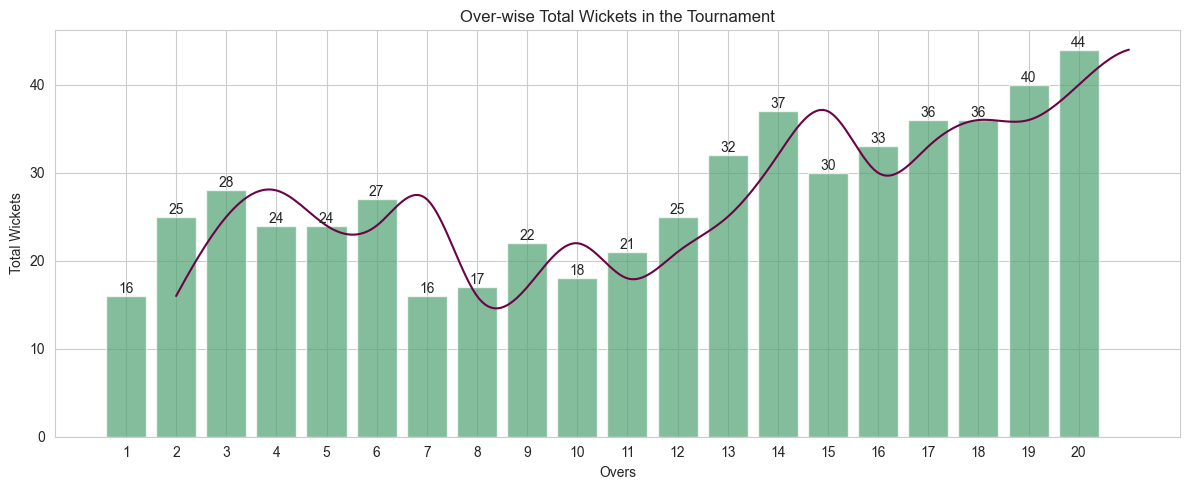

In [55]:
from scipy.interpolate import make_interp_spline

# Group data by 'over' and count the occurrences of non-null values in 'wicket_id'
wickets_data = df.groupby('over')['wicket_id'].count().reset_index()

# Plot bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))
sns.barplot(x='over', y='wicket_id', data=wickets_data, color='#41B06E', alpha=0.7)

# Smooth the line plot using cubic spline interpolation
smooth_line = make_interp_spline(wickets_data['over'], wickets_data['wicket_id'], k=3)
over_smooth = np.linspace(wickets_data['over'].min(), wickets_data['over'].max(), 300)
wicket_smooth = smooth_line(over_smooth)

# Plot curve plot
plt.plot(over_smooth, wicket_smooth, color='#6C0345')

# Add level at each bar
for index, value in enumerate(wickets_data['wicket_id']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Overs')
plt.ylabel('Total Wickets')
plt.title('Over-wise Total Wickets in the Tournament')
plt.grid(True)
plt.tight_layout()
plt.show()

#### *Average Wicket Count per Over in Tournament*

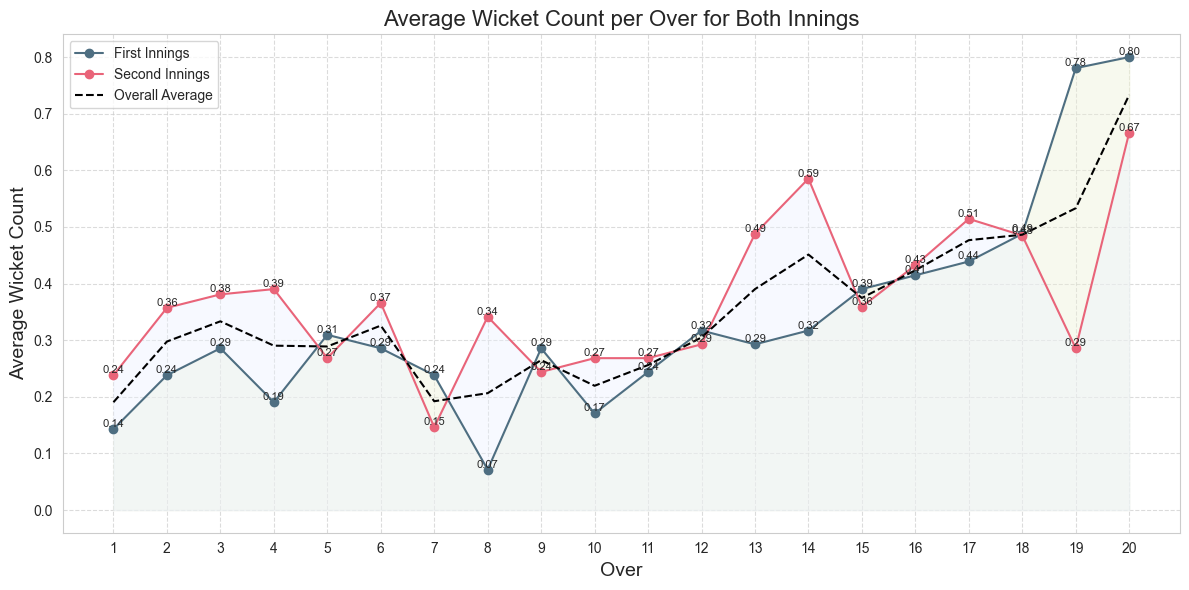

In [56]:
# Filter data for the first and second innings
first_innings_data = df[df['innings_id'] == 1]
second_innings_data = df[df['innings_id'] == 2]

# Group the DataFrame by 'match_id' and 'over' and count the number of wickets for each inning
first_innings_wickets = first_innings_data.groupby(['match_id', 'over'])['wicket_id'].count().reset_index()
second_innings_wickets = second_innings_data.groupby(['match_id', 'over'])['wicket_id'].count().reset_index()

# Calculate the average wicket count for each over across all matches for both innings
average_wickets_first_innings = first_innings_wickets.groupby('over')['wicket_id'].mean().reset_index()
average_wickets_second_innings = second_innings_wickets.groupby('over')['wicket_id'].mean().reset_index()

# Calculate the overall average wicket count per over for both innings
overall_average_wickets = (average_wickets_first_innings['wicket_id'] + average_wickets_second_innings['wicket_id']) / 2

# Plotting the average wicket count per over for both innings
plt.figure(figsize=(12, 6))
plt.plot(average_wickets_first_innings['over'], average_wickets_first_innings['wicket_id'], marker='o', color='#4E6E81', label='First Innings')
plt.plot(average_wickets_second_innings['over'], average_wickets_second_innings['wicket_id'], marker='o', color='#E96479', label='Second Innings')
plt.plot(average_wickets_first_innings['over'], overall_average_wickets, linestyle='--', color='black', label='Overall Average')

plt.fill_between(average_wickets_first_innings['over'], average_wickets_first_innings['wicket_id'], color='#EDF1D6', alpha=0.4)
plt.fill_between(average_wickets_second_innings['over'], average_wickets_second_innings['wicket_id'], color='#ECF2FF', alpha=0.4)

# Adding labels to each point
for x, y in zip(average_wickets_first_innings['over'], average_wickets_first_innings['wicket_id']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)
for x, y in zip(average_wickets_second_innings['over'], average_wickets_second_innings['wicket_id']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=8)

# Adding labels and title
plt.xlabel('Over', fontsize=14)
plt.ylabel('Average Wicket Count', fontsize=14)
plt.title('Average Wicket Count per Over for Both Innings', fontsize=16)
plt.xticks(range(1, 21))
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Country-wise Analysis

#### *Density Plot of Runs per Innings (Batting first vs Batting second)*

<Figure size 600x600 with 0 Axes>

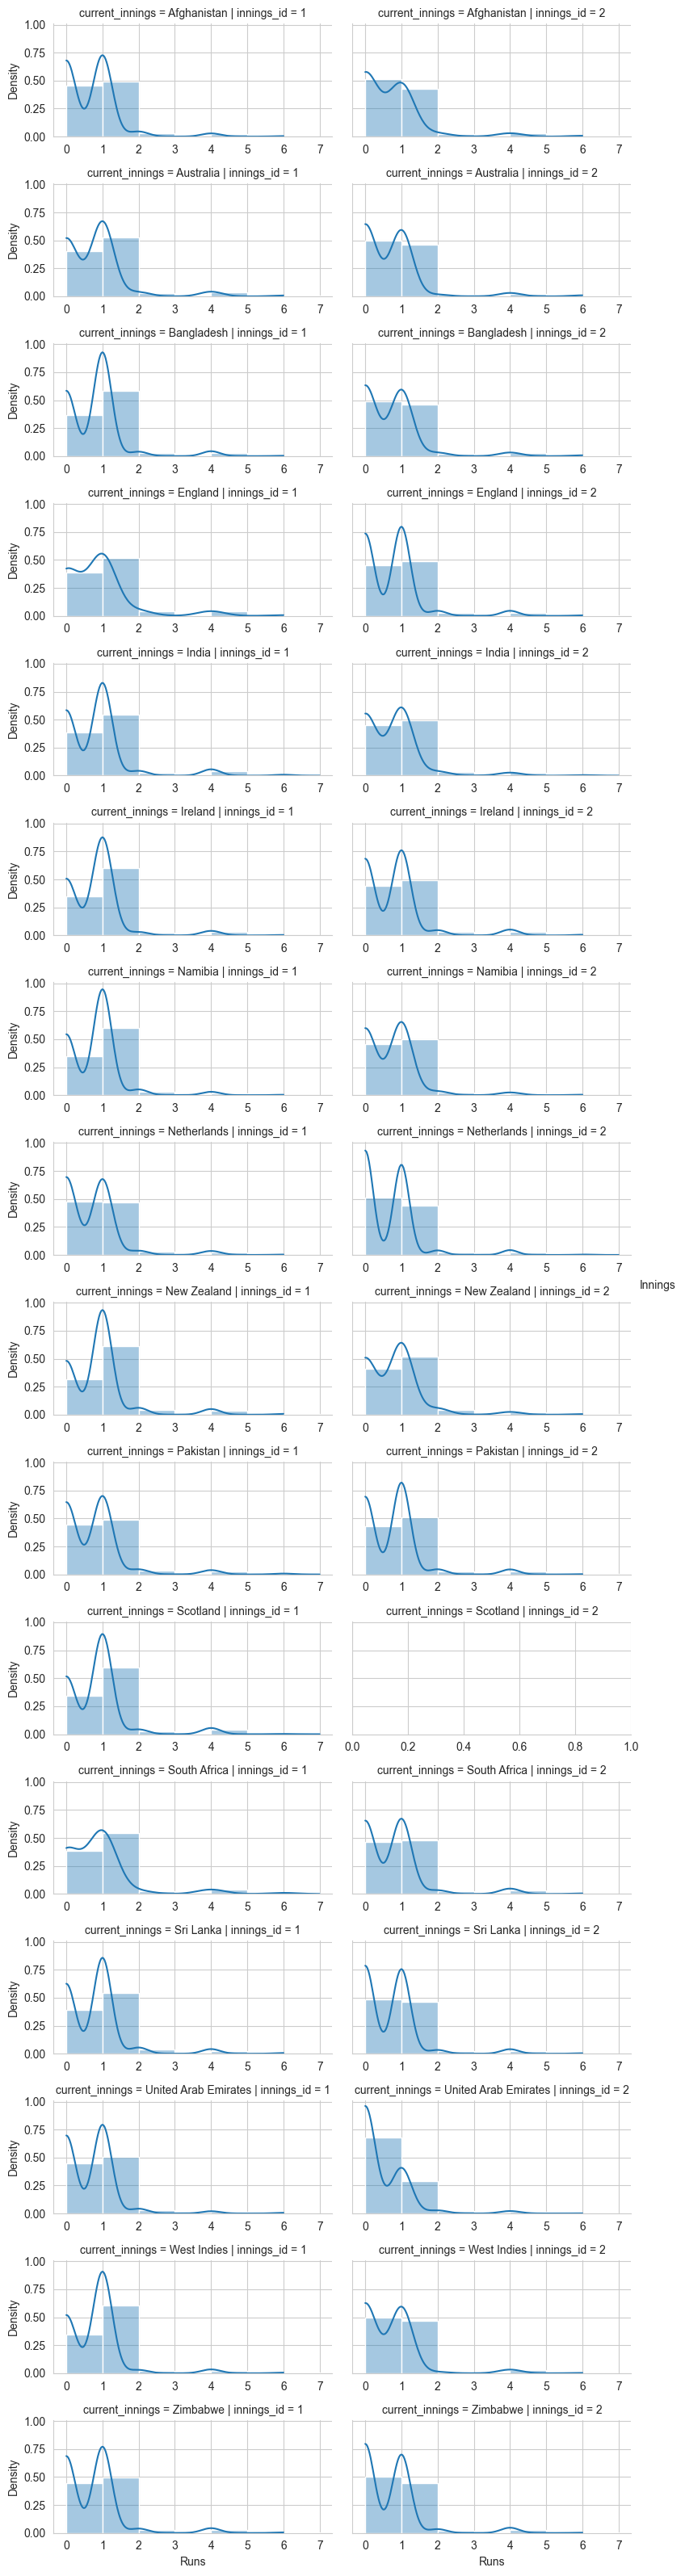

In [57]:
# Sort the current_innings values in alphabetical order
df['current_innings'] = pd.Categorical(df['current_innings'], categories=np.sort(df['current_innings'].unique()), ordered=True)

# Calculate the number of unique matches for each inning
matches_per_inning = df.groupby('innings_id')['match_id'].nunique()

# Calculate the count of runs for each inning and runs value
runs_count = df.groupby(['innings_id', 'runs']).size()

# Calculate the average count of runs per match for each inning and runs value
average_runs_count = runs_count / matches_per_inning

# Reset index to make 'innings_id' and 'runs' as columns
average_runs_count = average_runs_count.reset_index(name='average_count')

# Merge the average_runs_count DataFrame with the original DataFrame
df_merged = pd.merge(df, average_runs_count, on=['innings_id', 'runs'], how='left')

# Set the figure size
plt.figure(figsize=(6, 6))
# Create a FacetGrid for each country with two columns
g = sns.FacetGrid(df_merged, row="current_innings", col="innings_id", height=2, aspect=2, sharex=False)
# Plot the density plots for each inning
g.map_dataframe(sns.histplot, x="runs", weights="average_count", kde=True, alpha=0.4, fill=True, bins=range(8), palette="muted", stat="density")
g.set_axis_labels("Runs", "Density")
g.add_legend(title="Innings") # Adding legend
plt.show()

#### *Count of Dot Balls (Batting first vs Batting second)*

<Figure size 600x600 with 0 Axes>

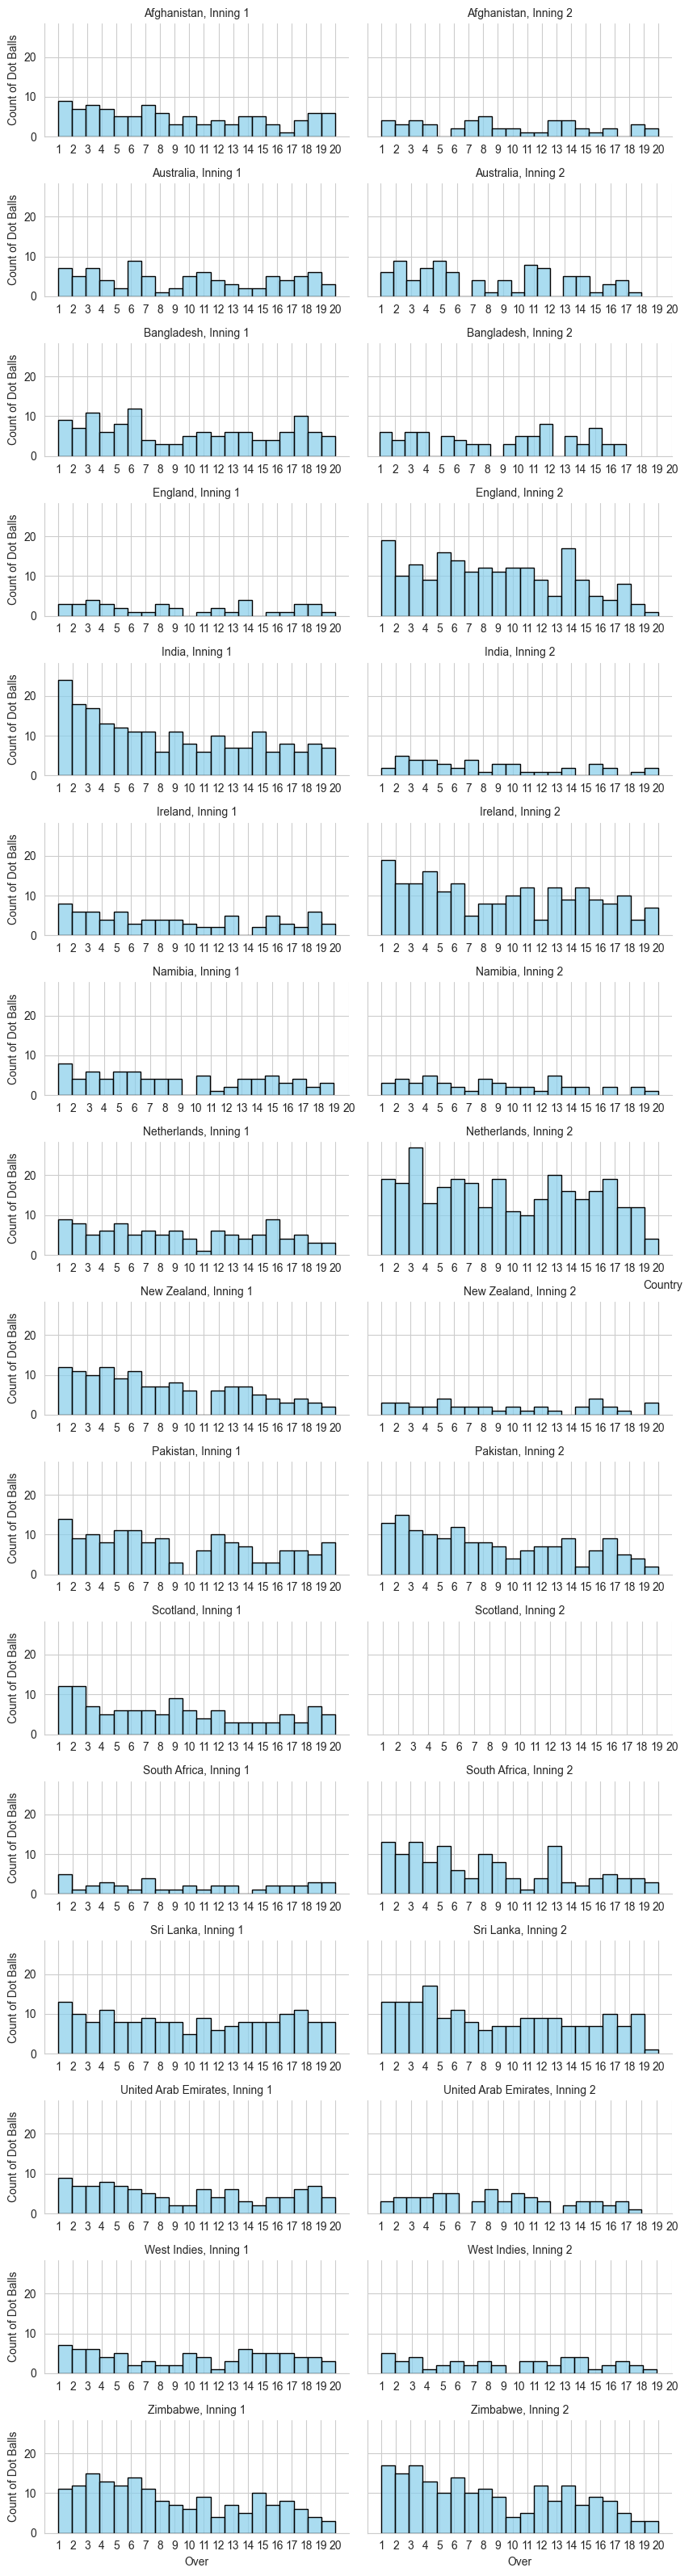

In [58]:
# Sort the unique country names in alphabetical order
sorted_countries = sorted(df['current_innings'].unique())
unique_overs = sorted(df['over'].unique()) # Get unique values of overs
dot_balls_data = df[df['runs'] == 0] # Filter data for dot balls (runs = 0)

# Set up the figure and axes for plotting
plt.figure(figsize=(6, 6))
# Create a FacetGrid for each country with two columns
g = sns.FacetGrid(dot_balls_data, row="current_innings", col="innings_id", 
                  row_order=sorted_countries, height=2, aspect=2, sharex=False)

# Plot the histograms for dot balls
g.map(sns.histplot, 'over', bins=len(unique_overs), color='skyblue', edgecolor='black', alpha=0.7)

# Set x-axis ticks and labels
for ax in g.axes.flat:
    ax.set_xticks(unique_overs)
    ax.set_xticklabels(unique_overs)

# Set labels and titles
g.set_axis_labels("Over", "Count of Dot Balls")
g.set_titles("{row_name}, Inning {col_name}")
g.add_legend(title="Country")
plt.tight_layout()
plt.show()

#### *Maximum Runs Scored vs Balls Faced in All Matches*

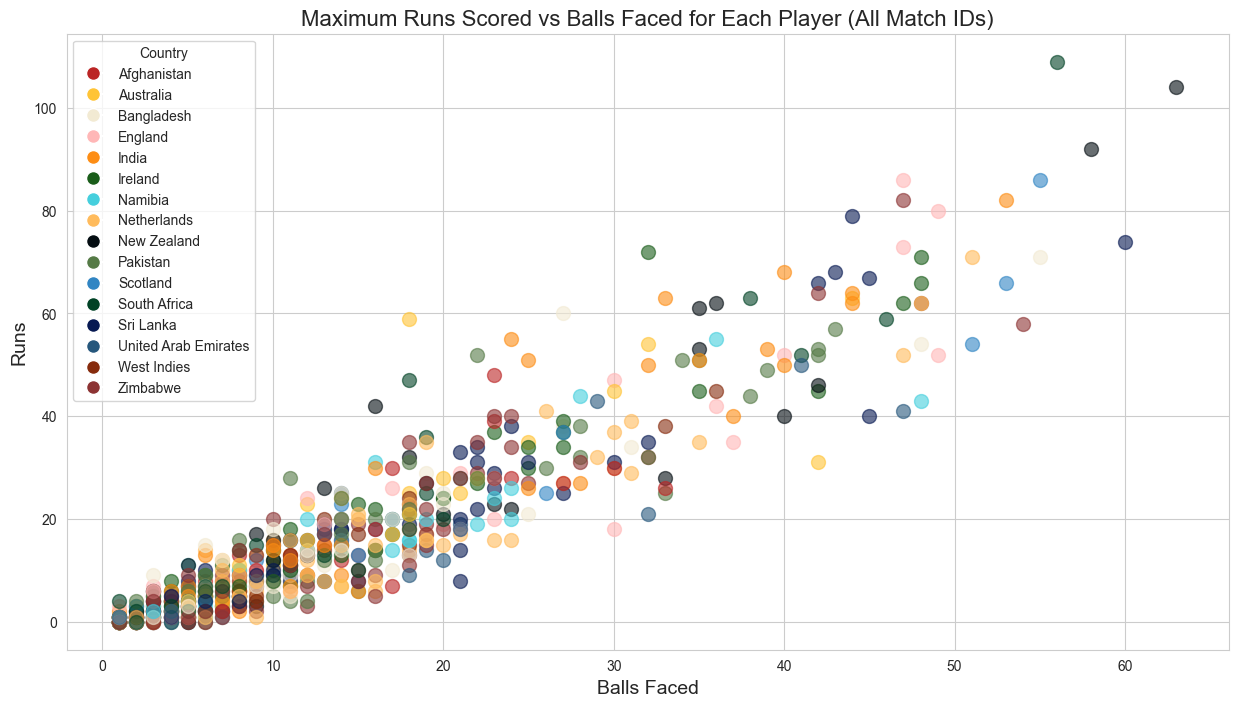

In [59]:
# Group data by 'batsman1_name' and find the maximum runs scored and corresponding balls faced
max_scores = df.groupby(['batsman1_name', 'match_id'])[['batsman1_runs', 'batsman1_balls', 'current_innings']].max().reset_index()
unique_countries = max_scores['current_innings'].unique()

# Creating scatter plot
plt.figure(figsize=(15, 8))
for index, row in max_scores.iterrows():
    plt.scatter(row['batsman1_balls'], row['batsman1_runs'], s=100, color=country_colors[row['current_innings']], alpha=0.6)

plt.xlabel('Balls Faced', fontsize = 14)
plt.ylabel('Runs', fontsize = 14)
plt.title('Maximum Runs Scored vs Balls Faced for Each Player (All Match IDs)', fontsize = 16)

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, 
                             label=country) for country, color in country_colors.items() if country in unique_countries]
plt.legend(handles=legend_handles, title='Country')
plt.grid(True)
plt.show()

#### *Total Runs scored in each Over by Countries in All Matches*

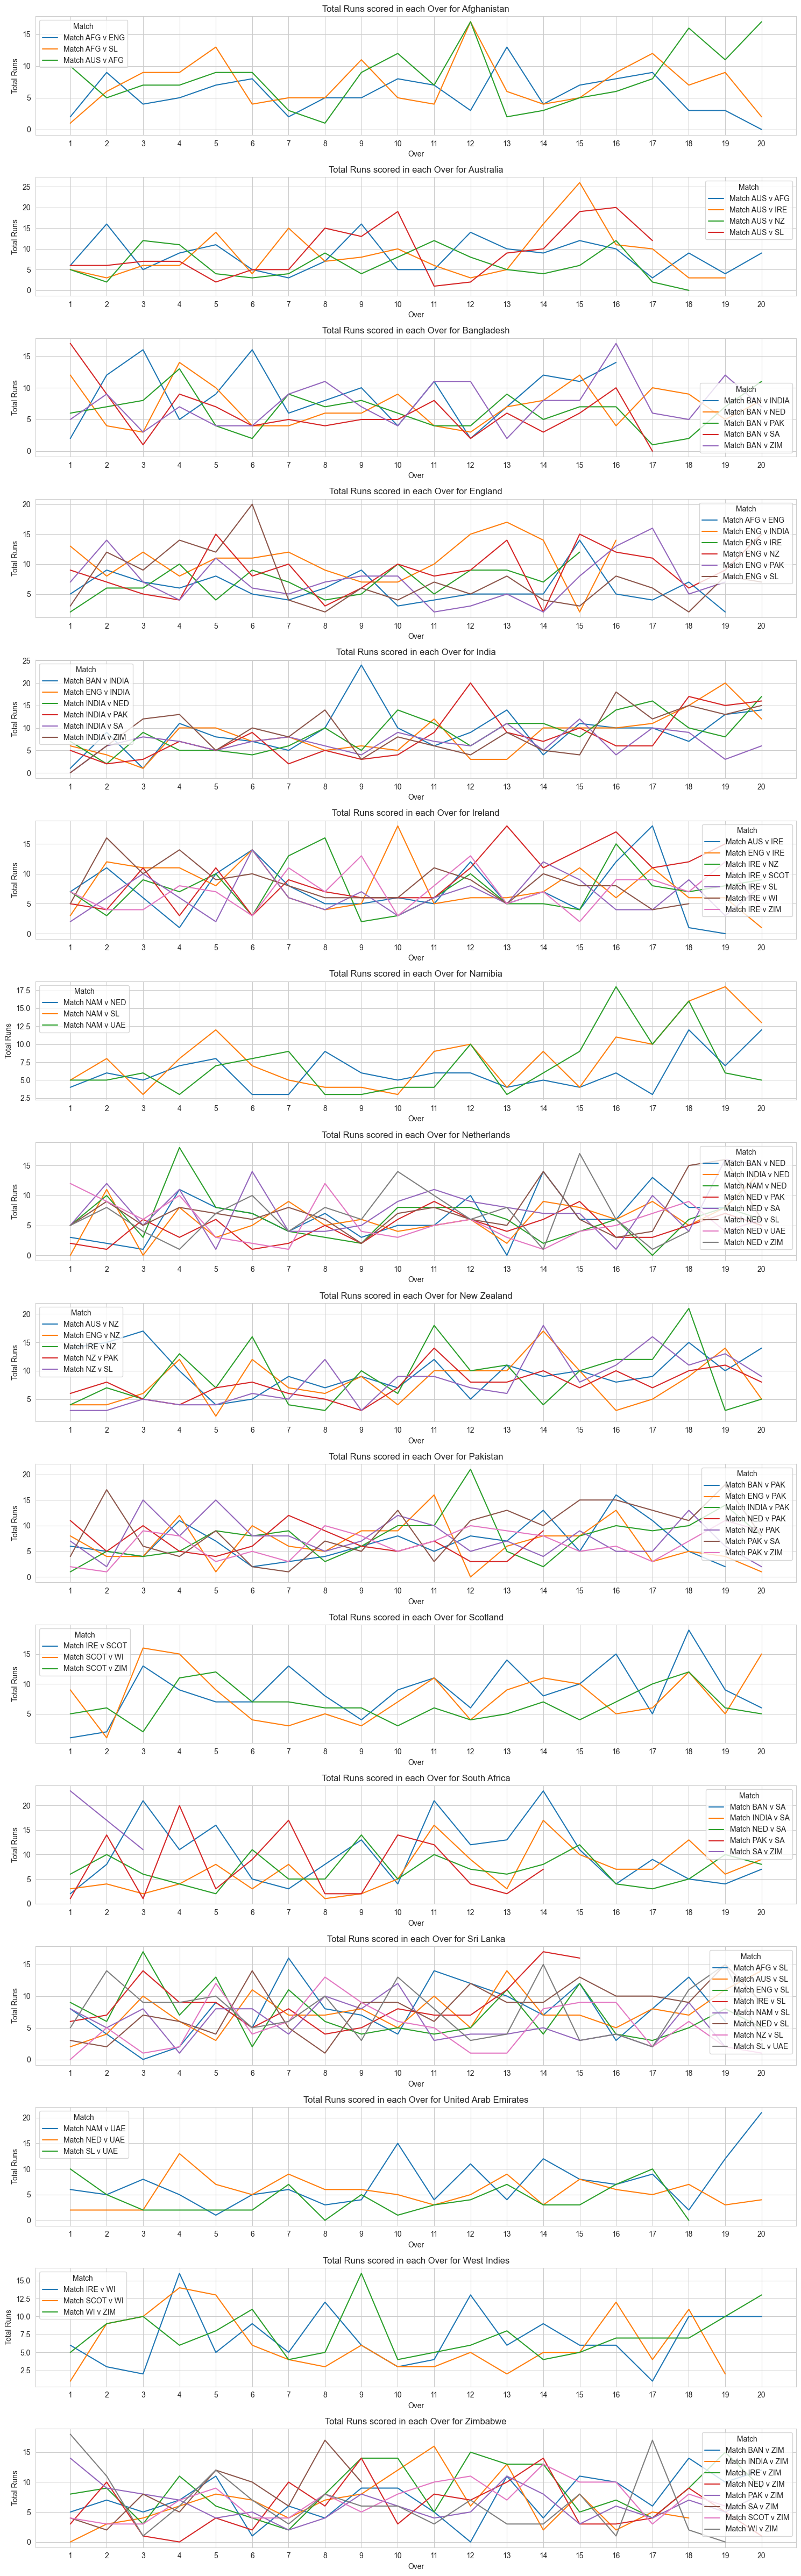

In [60]:
# Get unique country names from 'current_innings' in alphabetical order
countries = sorted(df['current_innings'].unique())

# Calculate the number of rows and columns for subplots
num_countries = len(countries)
num_cols = 1
num_rows = num_countries

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Iterate over each country and plot its data
for idx, country in enumerate(countries):
    # Filter data for the current country
    country_data = df[df['current_innings'] == country]
    
    # Group data by 'match_name' and 'over' and calculate the sum of runs for each combination
    grouped_data = country_data.groupby(['match_name', 'over'])['runs'].sum().reset_index()
    
    # Pivot the data to have 'over' as columns and 'runs' as values
    pivot_data = grouped_data.pivot_table(index='over', columns='match_name', values='runs').reset_index()

    # Plot data in the corresponding subplot
    ax = axes[idx]
    for column in pivot_data.columns[1:]:
        ax.plot(pivot_data['over'], pivot_data[column], label=f'Match {column}')

    # Add labels and title
    ax.set_xlabel('Over')
    ax.set_ylabel('Total Runs')
    ax.set_title(f'Total Runs scored in each Over for {country}')
    
    # Set x-axis ticks to display over values from 1 to 20
    ax.set_xticks(range(1, 21))

    # Add legend
    ax.legend(title='Match')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#### *Density plot of bowling economy*

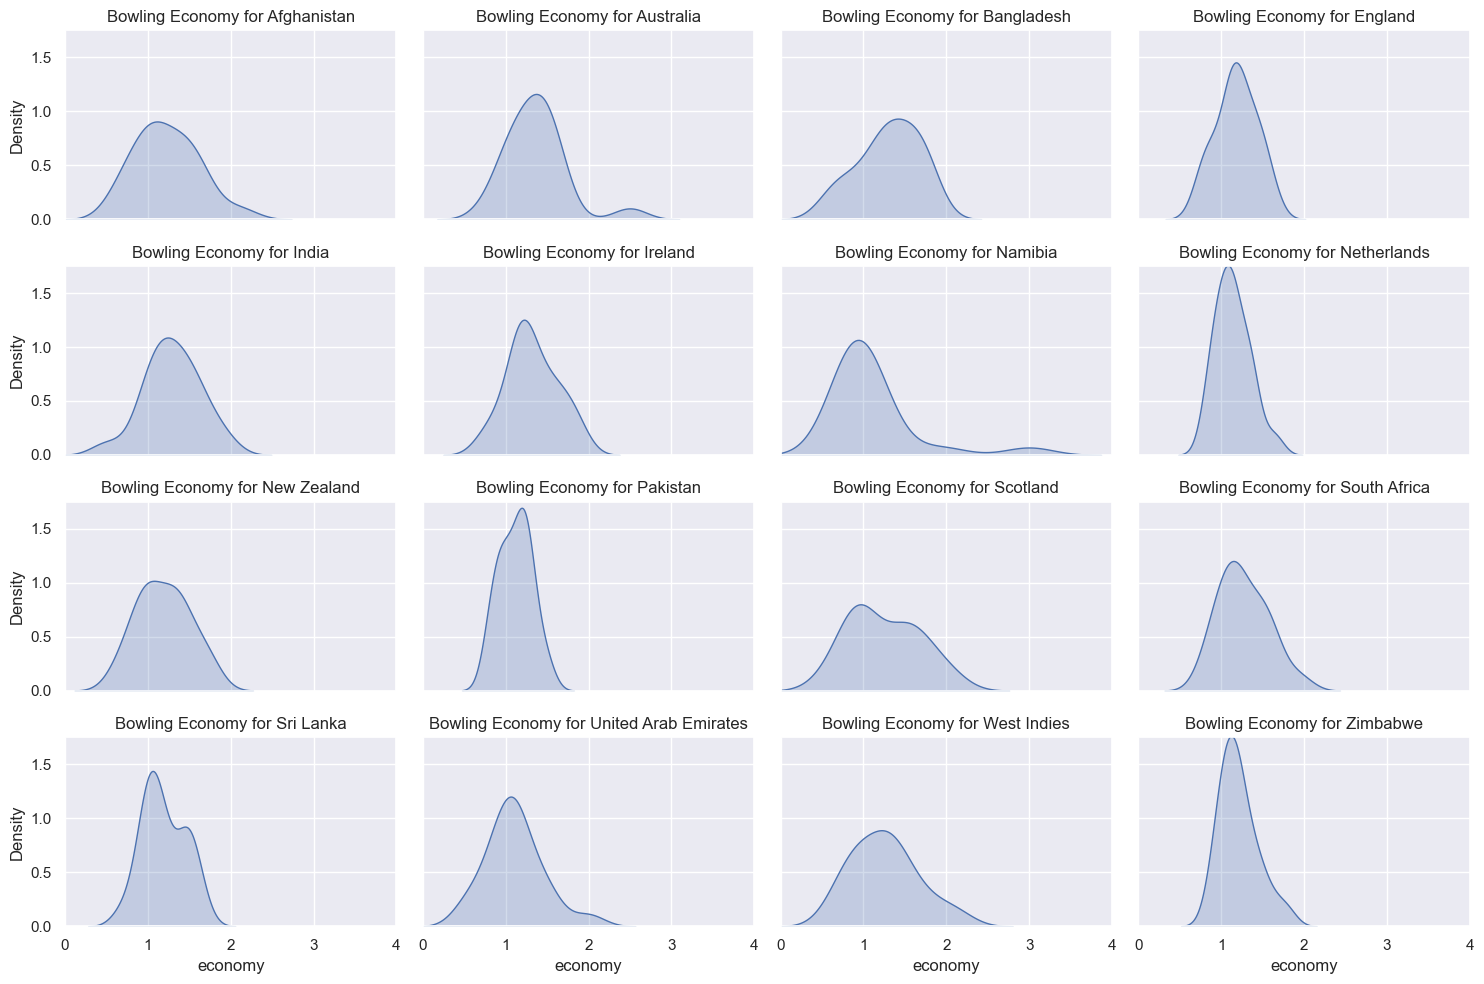

In [61]:
# Set the Seaborn theme
sns.set_theme(style='darkgrid') 
# Get unique country names from 'bowling_innings'
countries = sorted(df['bowling_innings'].unique())

# Determine the number of rows and columns for subplots
num_countries = len(countries)
num_cols = 4  # Four graphs in each row
num_rows = -(-num_countries // num_cols)  # Ceiling division to ensure all countries are accommodated
x_limit = (0, 4) 
y_limit = (0, 1.75)

# Create subplots for each country
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2.5 * num_rows), sharex=True, sharey=True)

# Plot the density curve of bowling economy for each country
for i, country in enumerate(countries):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Filter data for the current country
    country_data = df[df['bowling_innings'] == country]
    
    # Group data by 'over' and calculate the total runs and count of 'match_id' for each over
    grouped_data = country_data.groupby('over').agg(total_runs=('runs', 'sum'), matches=('match_id', 'count')).reset_index()
    
    # Calculate the average runs per over (bowling economy)
    grouped_data['economy'] = grouped_data['total_runs'] / grouped_data['matches']
    
    # Plot the density curve of bowling economy for the current country
    sns.kdeplot(grouped_data['economy'], ax=ax, fill=True)
    
    # Set title for each subplot
    ax.set_title(f'Bowling Economy for {country}')
    
    # Set x-axis and y-axis limits
    ax.set_xlim(x_limit)
    ax.set_ylim(y_limit)

# Set common xlabel and ylabel
plt.ylabel('Density')
plt.tight_layout()
plt.show()